<a href="https://colab.research.google.com/github/shylitboi/Personal-Project/blob/main/Walmart_%EC%9E%A5%EB%B0%94%EA%B5%AC%EB%8B%88_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 목표:


✅ APAC 내 4개 지역(Central Asia, North Asia, Southeast Asia, Oceania)의 특성을 분석하여 지역별 소비 패턴, 할인 반응도, 배송 방식 선호도 등을 파악


✅ 각 지역 내 고객 세분화 수행


✅ 고객 세그먼트 별 맞춤형 프로모션 전략 & 최적의 할인률 도출

In [ ]:
# 필요 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/raw data/다트비🎯/사전과제/[DArt-B 5기] Global_Supermarket.csv")
df1 = df.copy()
df1.head()

,customer_id,customer_name,customer_segment,order_id,order_city,oreder_region,order_date,order_year,order_weeknum,quantity,...,discount,category,sub_category,market_country,market_area,market_city,ship_date,ship_mode,shipping_cost,row_id
0,LS-172304,Lycoris Saunders,Consumer,CA-2019-130813,Los Angeles,West,2019-01-07,2019,2,3,...,0.0,Office Supplies,Paper,United States,US,California,2019-01-09,Second Class,4.37,36624
1,MV-174854,Mark Van Huff,Consumer,CA-2019-148614,Los Angeles,West,2019-01-21,2019,4,2,...,0.0,Office Supplies,Paper,United States,US,California,2019-01-26,Standard Class,0.94,37033
2,CS-121304,Chad Sievert,Consumer,CA-2019-118962,Los Angeles,West,2019-08-05,2019,32,3,...,0.0,Office Supplies,Paper,United States,US,California,2019-08-09,Standard Class,1.81,31468
3,CS-121304,Chad Sievert,Consumer,CA-2019-118962,Los Angeles,West,2019-08-05,2019,32,2,...,0.0,Office Supplies,Paper,United States,US,California,2019-08-09,Standard Class,4.59,31469
4,AP-109154,Arthur Prichep,Consumer,CA-2019-146969,Los Angeles,West,2019-09-29,2019,40,1,...,0.0,Office Supplies,Paper,United States,US,California,2019-10-03,Standard Class,1.32,32440


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 소개

데이터 크기: 51,290 * 24

기간: 2019년~2022년까지 주문 데이터

주요 컬럼:

1. 고객 관련 정보

customer_id : 고객 ID

customer_name : 고객 이름

customer_segment : 고객 유형 (Consumer: 개인 고객, Corporate: 기업 고객, Home Office: 재택근무 사무실)

2. 주문 관련 정보

order_id : 주문 ID

order_city : 주문이 발생한 도시

order_region : 주문 지역

order_date : 주문 날짜

order_year : 주문 연도

order_weeknum : 주문한 주(week) 번호

3. 제품 및 판매 정보

quantity : 주문 수량

sales : 주문 금액 (할인 적용 후 금액)

product_id : 상품 ID

product_name : 상품명

profit : 주문 이익

discount : 해당 주문의 할인율

category : 상품의 카테고리

sub_category : 상품의 세부 카테고리

4. 시장 및 지역 정보

market_country : 슈퍼마켓이 위치한 국가

market_area : 슈퍼마켓 운영 시장 또는 지역, 넓음

APAC: 아시아 태평양

LATAM: 라틴 아메리카

EMEA: 유럽, 중동, 아프리카

market_city : 슈퍼마켓이 위치한 도시

5. 배송 관련 정보

ship_date : 배송 날짜

ship_mode : 배송 방식

Same Day: 당일 배송

First Class: 1등급 배송

Second Class: 2등급 배송

Standard Class: 일반 배송

shipping_cost : 배송비

6. 기타 : row_id : 행 번호

In [ ]:
# 데이터 확인
df1.info()
print("\n")
df1.isna().sum() # 결측치 없음
print("\n")
len(list(df1.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       51290 non-null  object 
 1   customer_name     51290 non-null  object 
 2   customer_segment  51290 non-null  object 
 3   order_id          51290 non-null  object 
 4   order_city        51290 non-null  object 
 5   oreder_region     51290 non-null  object 
 6   order_date        51290 non-null  object 
 7   order_year        51290 non-null  int64  
 8   order_weeknum     51290 non-null  int64  
 9   quantity          51290 non-null  int64  
 10  sales             51290 non-null  int64  
 11  product_id        51290 non-null  object 
 12  product_name      51290 non-null  object 
 13  profit            51290 non-null  float64
 14  discount          51290 non-null  float64
 15  category          51290 non-null  object 
 16  sub_category      51290 non-null  object

24

# 전처리
전처리 로직 : 지역 데이터셋 분리, 필요 없는 칼럼 삭제, 칼럼명 수정, 칼럼 속성 수정

In [ ]:
df1.rename(columns={"oreder_region": "order_region"}, inplace=True) # 칼럼명 오타 수정

In [ ]:
# datetime으로 수정
df1['order_date'] = pd.to_datetime(df1['order_date'])
df1['ship_date'] = pd.to_datetime(df1['ship_date'])

In [ ]:
print(len(list(df1['market_city'].unique()))) # 너무 많고 알아볼 수 없다
print(len(list(df1['product_name'].unique()))) # 너무 많고 알아볼 수 없다 22..

1094
3788


In [ ]:
# Apac data 필터링
df1 = df1[df1['market_area'] == 'APAC']
df1['order_region'].unique()

array(['Central Asia', 'North Asia', 'Oceania', 'Southeast Asia'],
      dtype=object)

In [ ]:
# 필요 없는 컬럼 삭제
df1.drop(['order_city','customer_name','order_id','order_year','order_weeknum','product_id','product_name','market_city','row_id','market_area','market_country'],axis=1,inplace=True)

In [ ]:
# 평균 주문 금액  추가
df1['avg_sales'] = df1['sales']/df1['quantity']
df1

,customer_id,customer_segment,order_region,order_date,quantity,sales,profit,discount,category,sub_category,ship_date,ship_mode,shipping_cost,avg_sales
3318,NM-184451,Home Office,Central Asia,2019-01-26,3,79,25.380,0.0,Office Supplies,Paper,2019-01-28,Second Class,13.82,26.333333
3319,DB-132701,Home Office,North Asia,2019-02-14,3,58,5.130,0.0,Office Supplies,Fasteners,2019-02-16,Second Class,6.70,19.333333
3329,PS-190451,Home Office,North Asia,2019-04-16,3,18,0.540,0.0,Office Supplies,Binders,2019-04-17,First Class,4.20,6.000000
3330,PS-190451,Home Office,North Asia,2019-04-16,4,200,57.960,0.0,Office Supplies,Envelopes,2019-04-17,First Class,10.67,50.000000
3331,PS-190451,Home Office,North Asia,2019-04-16,3,145,70.920,0.0,Office Supplies,Paper,2019-04-17,First Class,36.53,48.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46089,AZ-107501,Consumer,Oceania,2022-10-14,7,355,70.812,0.1,Furniture,Chairs,2022-10-20,Standard Class,24.45,50.714286
46090,BE-113351,Home Office,Oceania,2022-10-25,7,1234,-0.021,0.1,Furniture,Bookcases,2022-10-29,Standard Class,93.30,176.285714
46091,BE-113351,Home Office,Oceania,2022-10-25,1,48,15.006,0.1,Office Supplies,Art,2022-10-29,Standard Class,2.34,48.000000
46092,IG-150851,Consumer,Oceania,2022-10-28,9,1038,149.769,0.1,Furniture,Chairs,2022-11-04,Standard Class,61.46,115.333333


# EDA
목적:
지역별 소비 패턴 + 고객 구매 행태를 통합 분석하여, 맞춤형 전략의 기반을 구축


데이터셋에 포함된 주요 칼럼

수치형: sales(매출), profit(이익), discount(할인율), quantity(주문량), shipping_cost(배송비), avg_sales()

범주형: order_region(지역), category(상품 카테고리), sub_category(세부 카테고리), ship_mode(배송 방식), customer_segment(고객 세그먼트)

날짜: order_date, ship_date

식별: customer_id(고객 식별)

## 1. 지역 별 구매 행태 분석

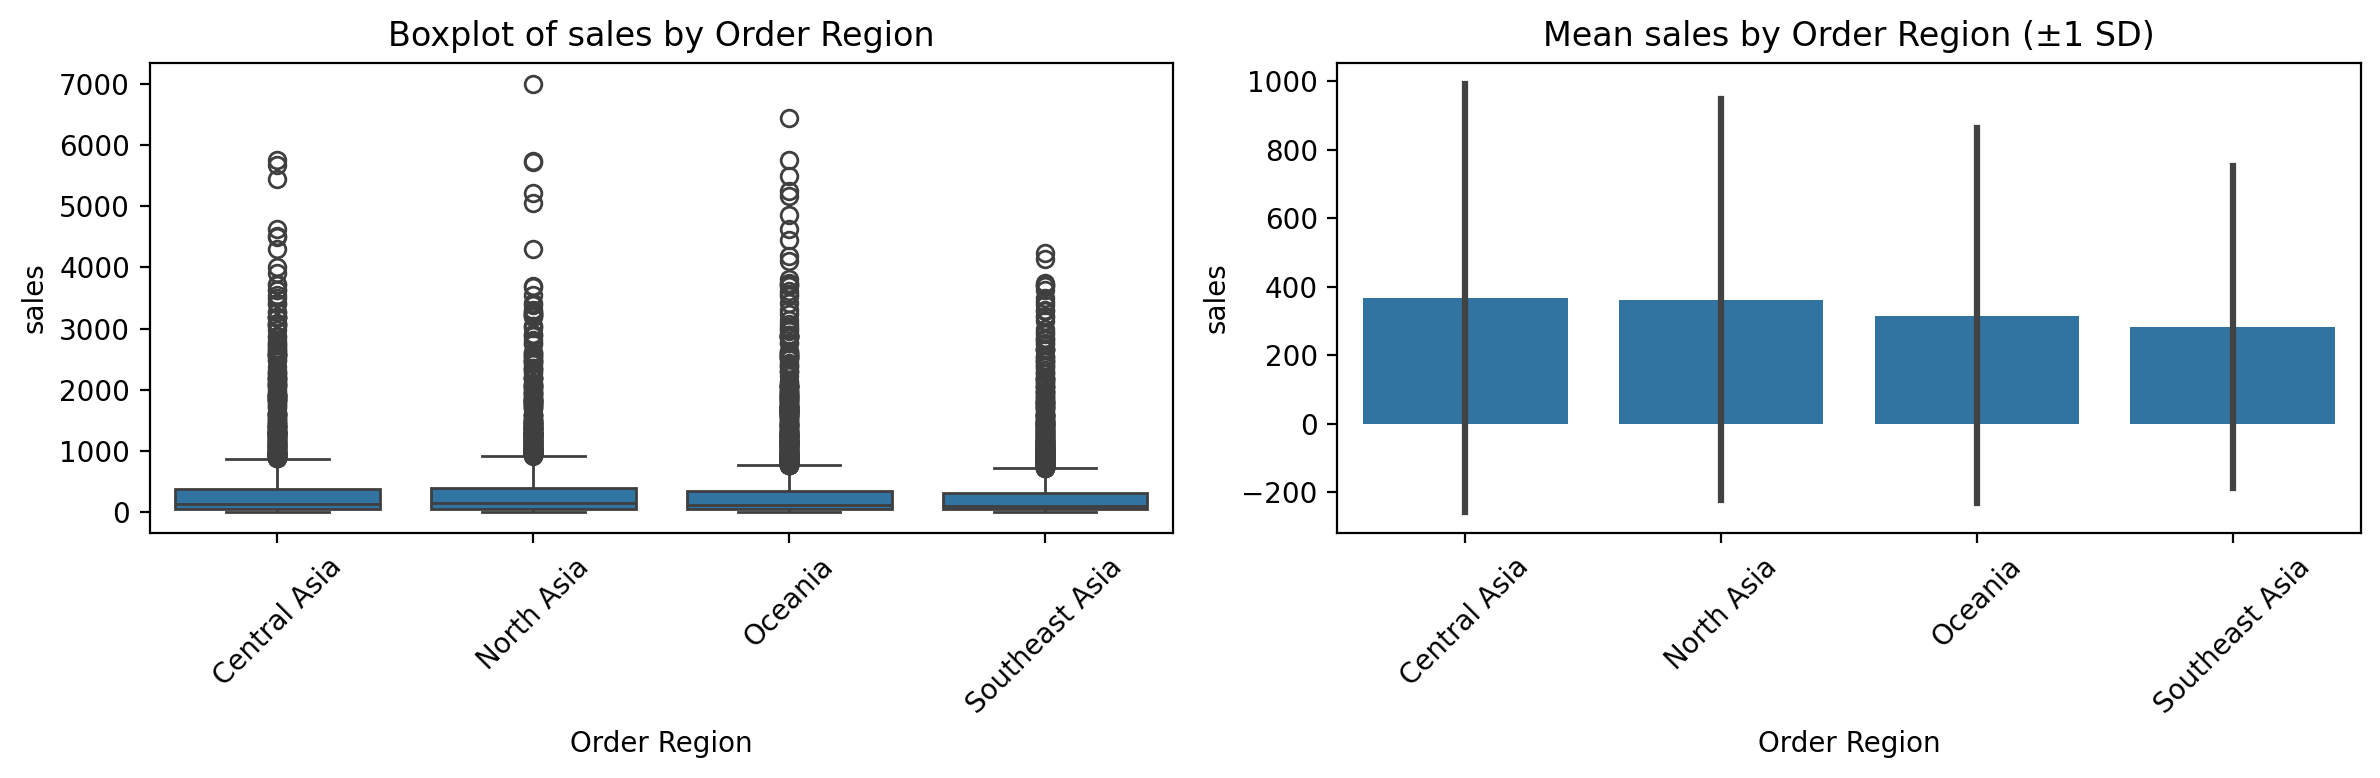

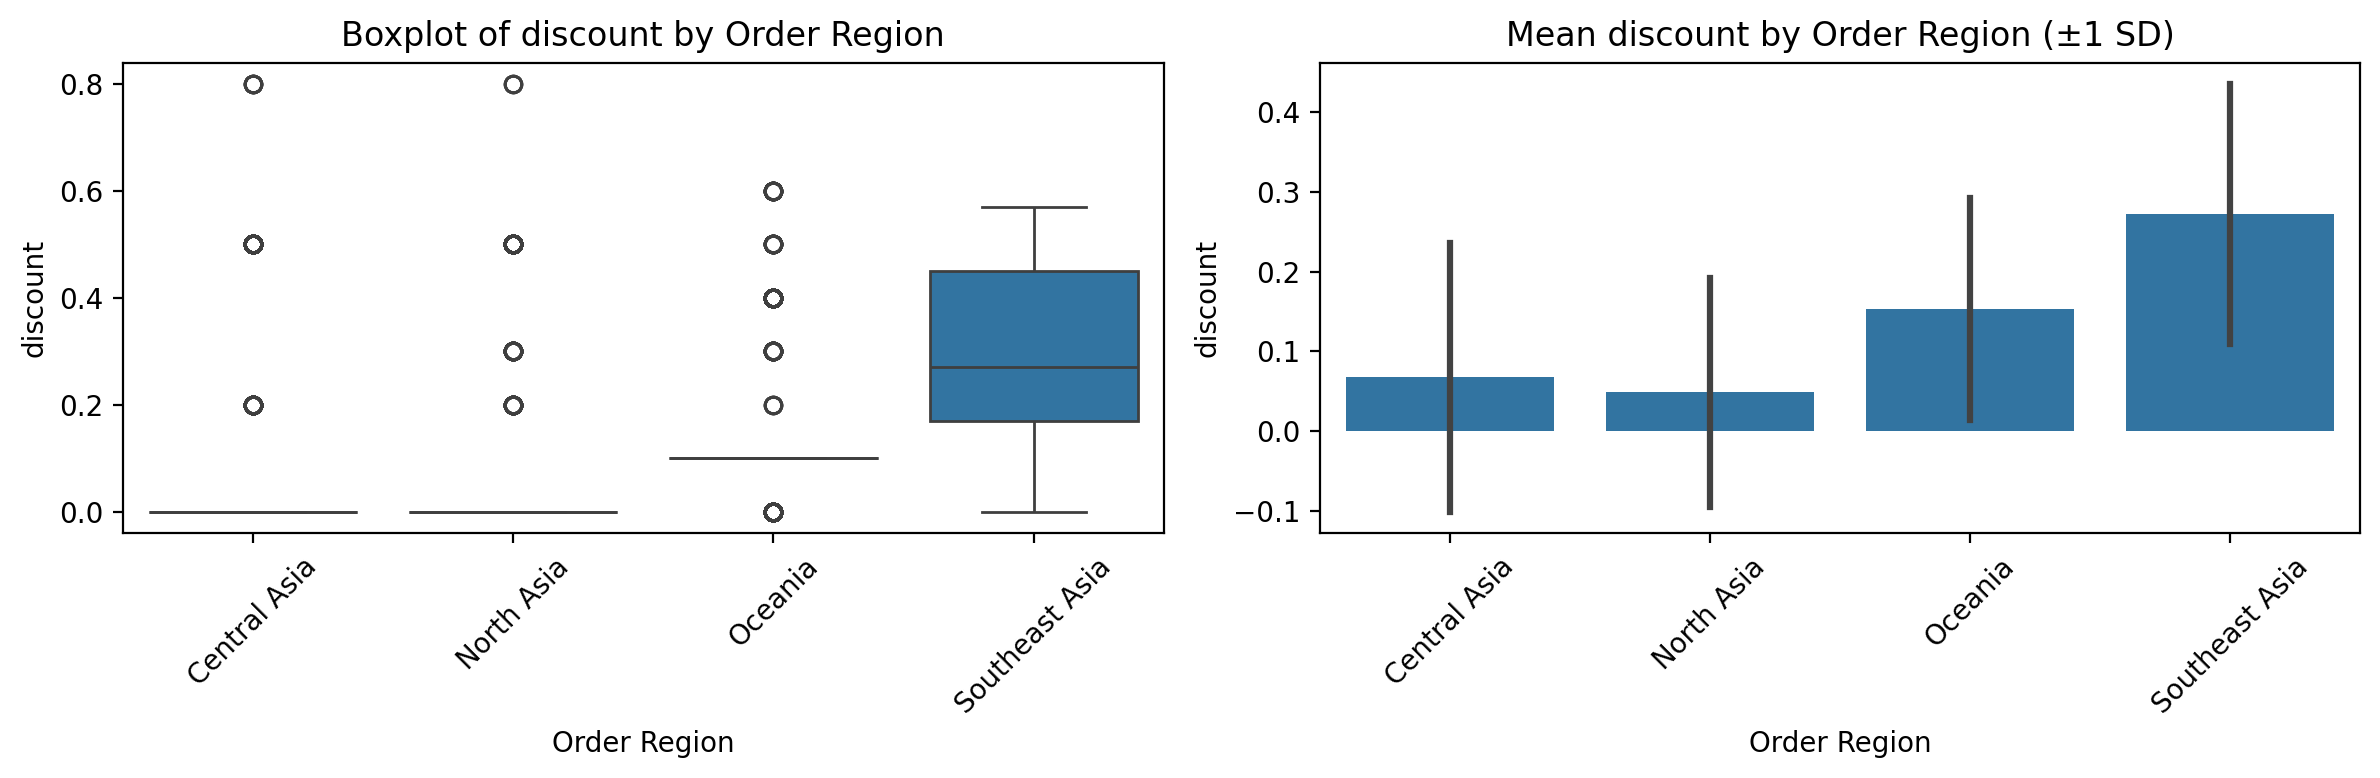

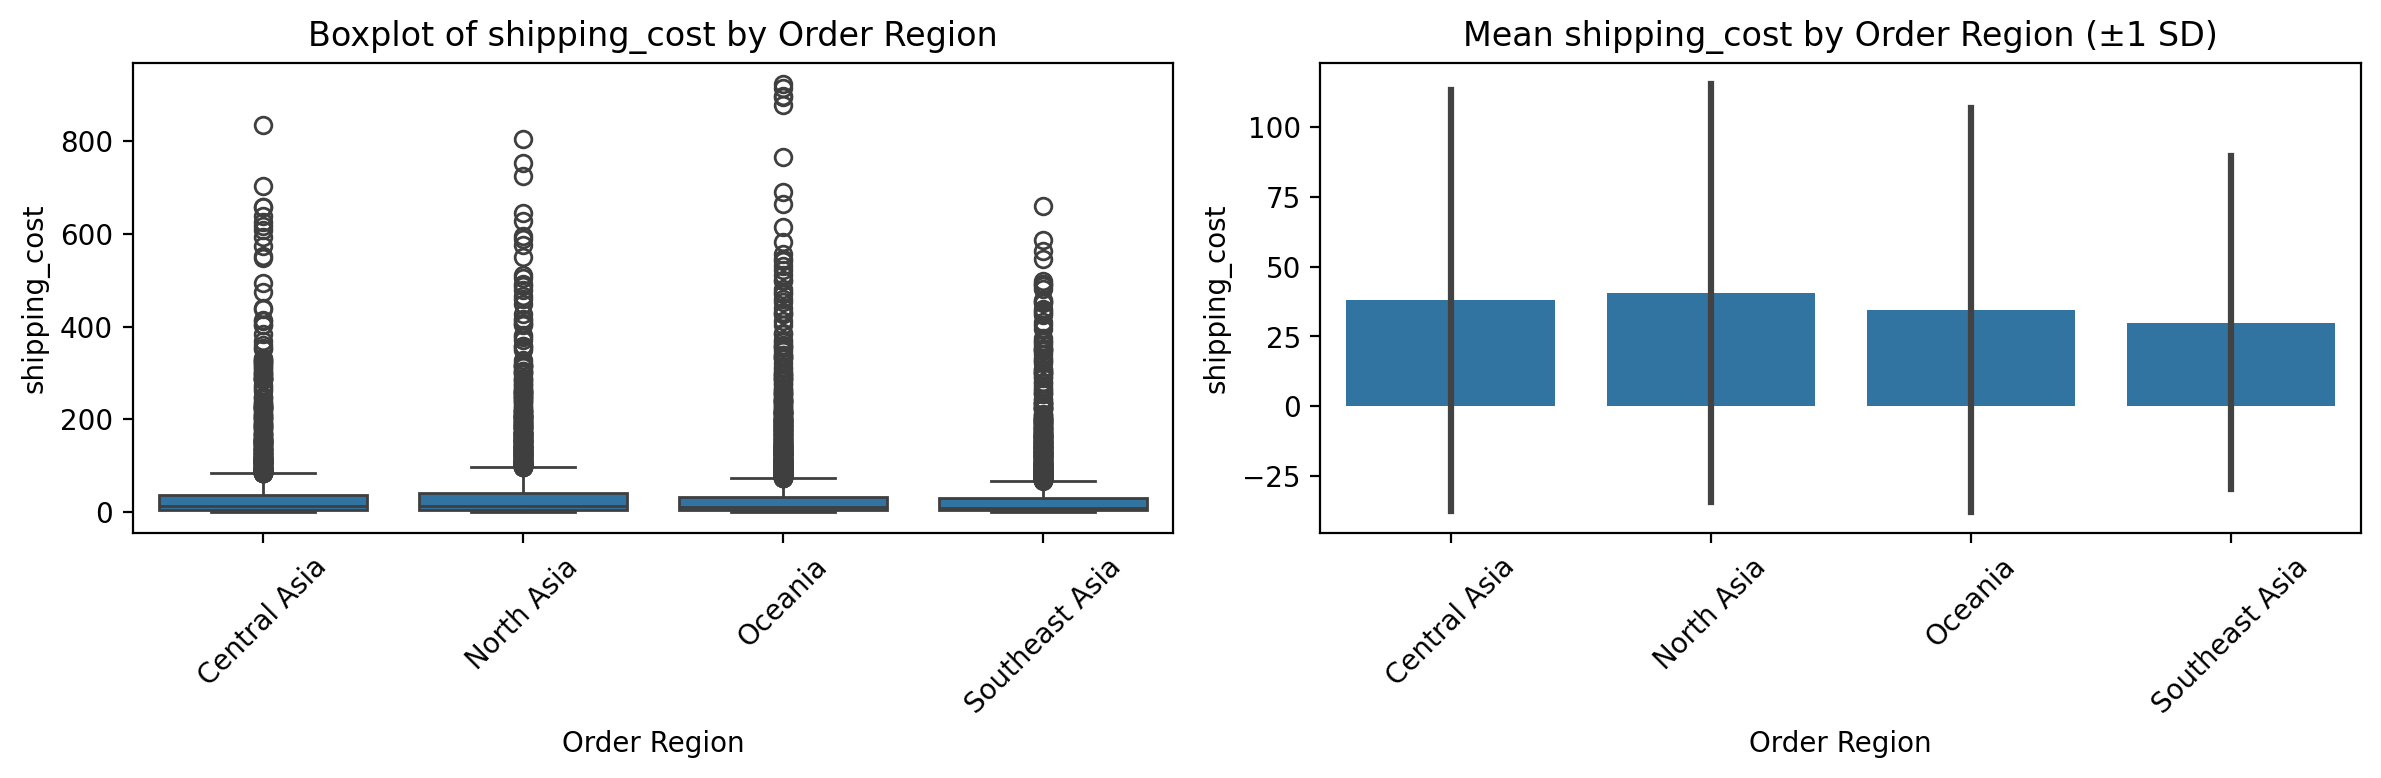

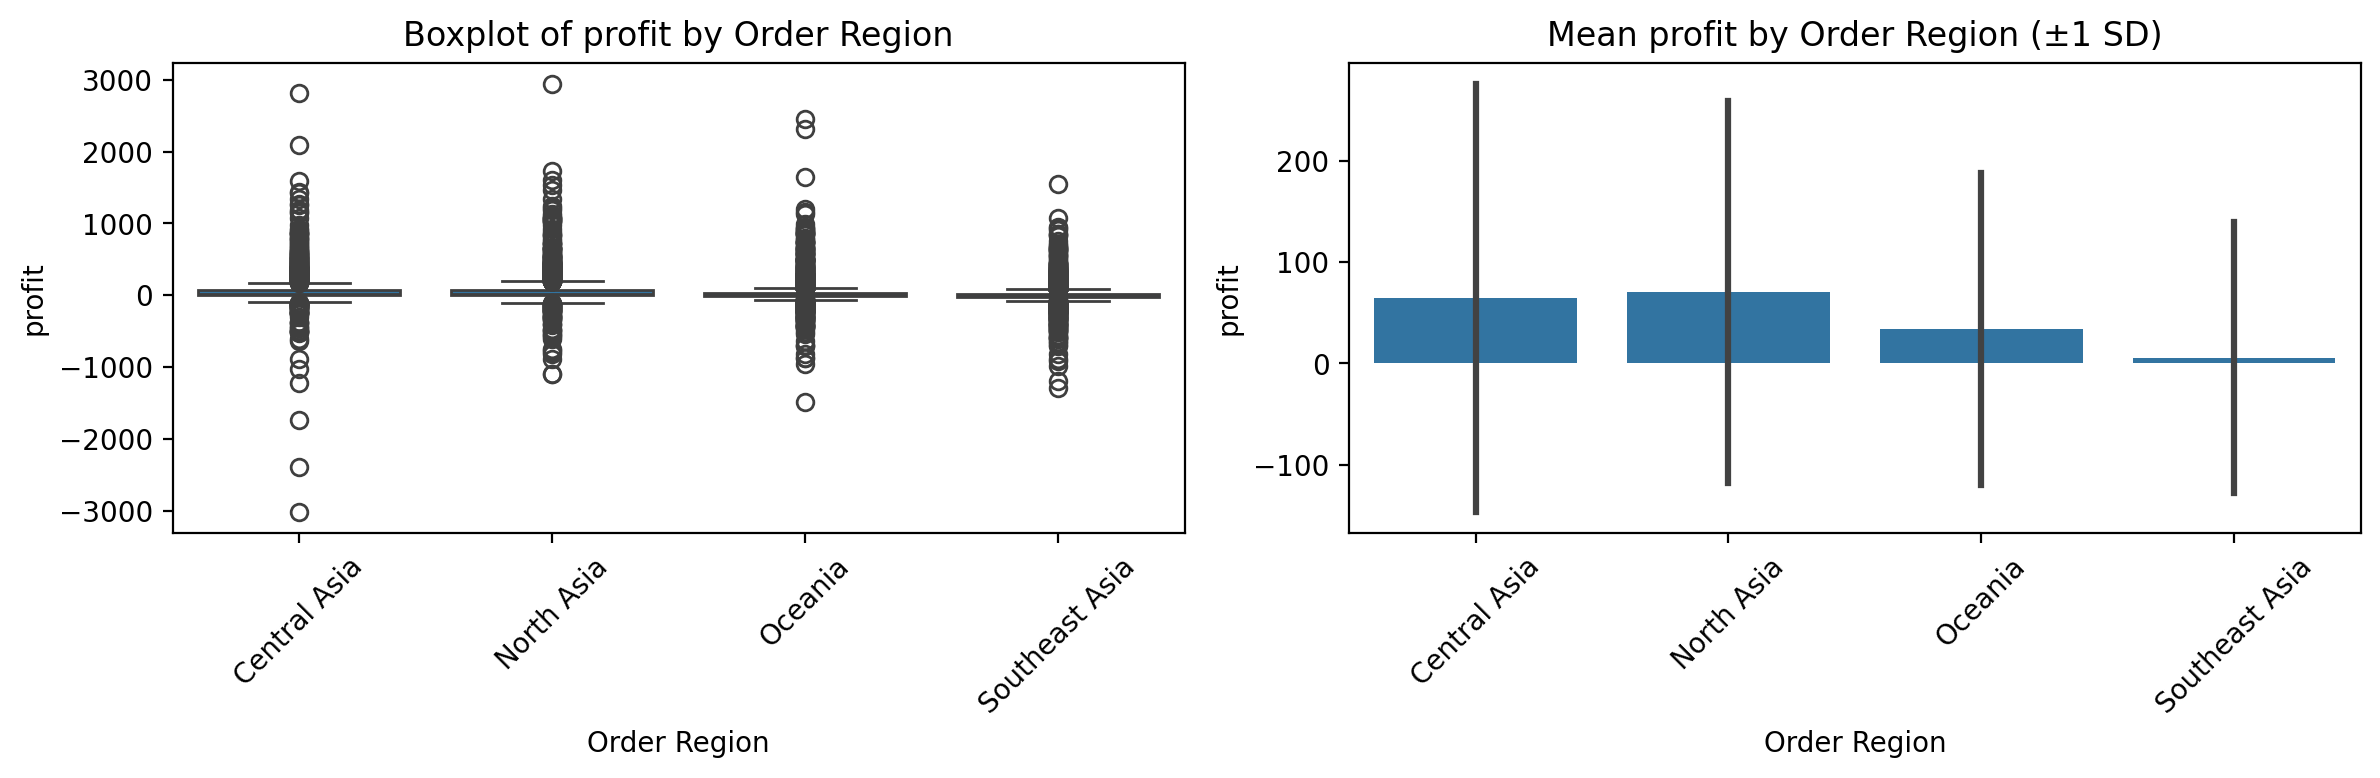

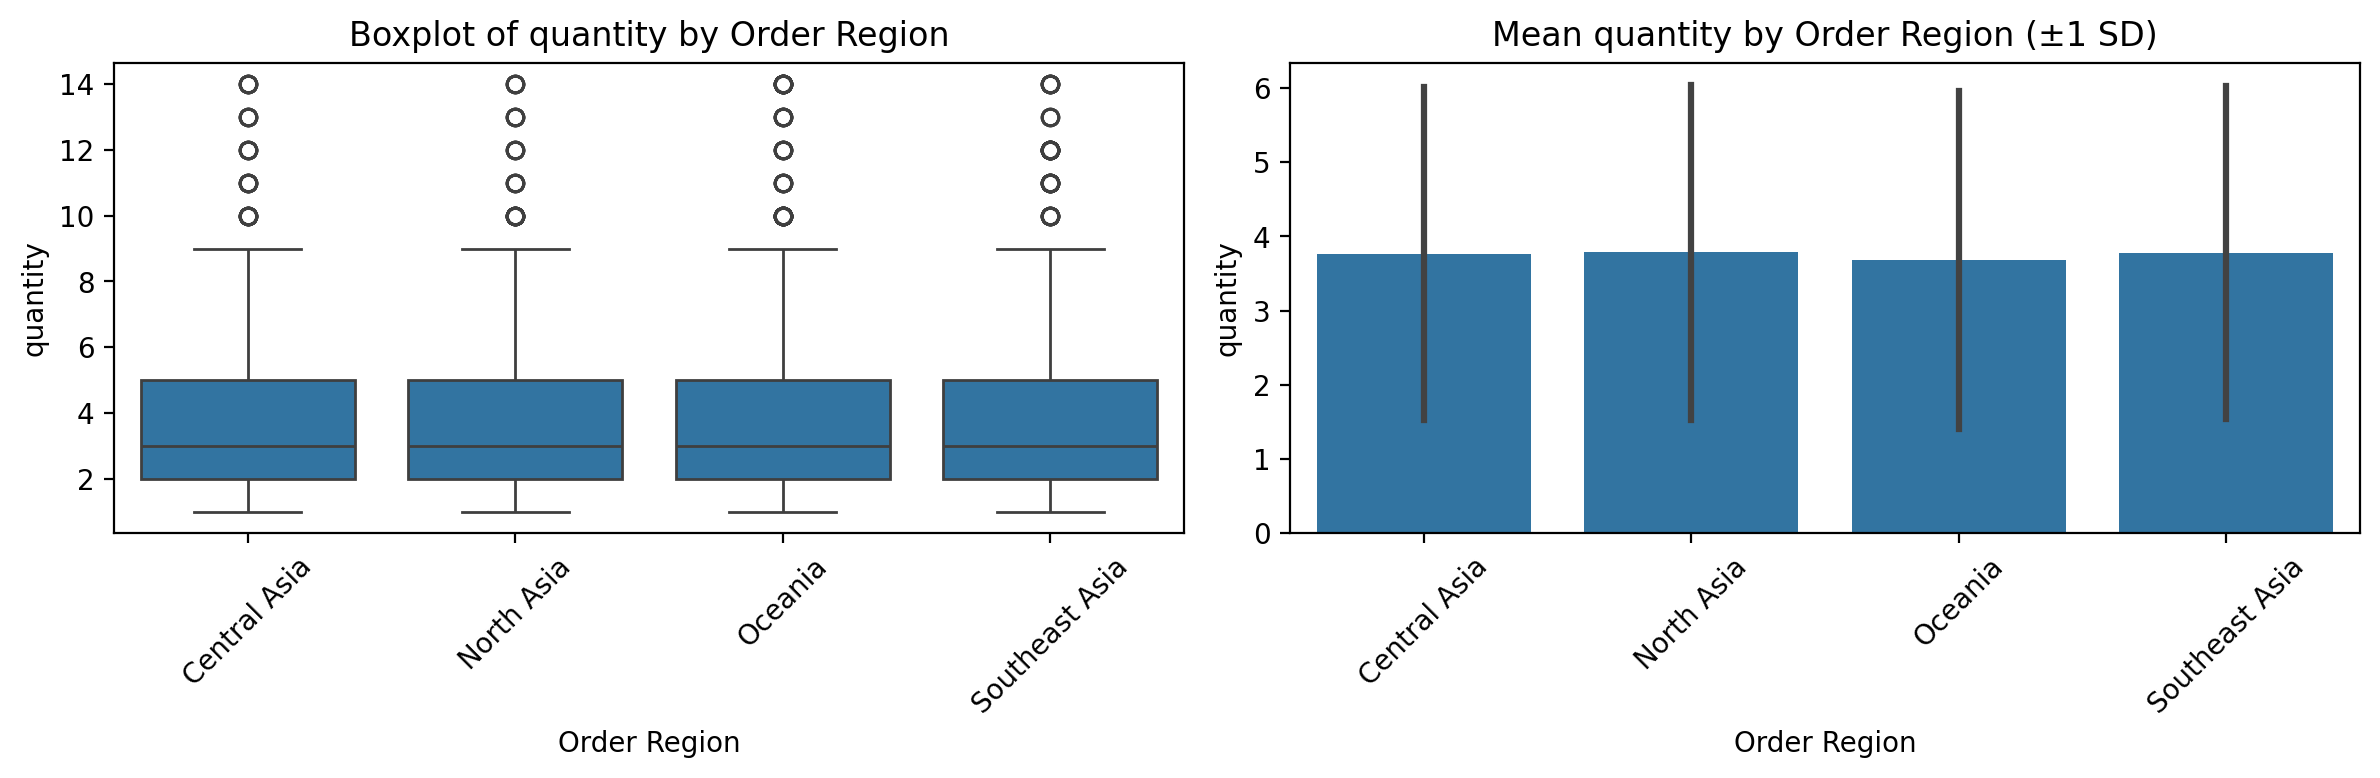

In [ ]:
# 지역 별 매출 변수 시각화

target_vars = ['sales', 'discount', 'shipping_cost', 'profit', 'quantity']

for var in target_vars:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # 1) Boxplot
    sns.boxplot(
        data=df1,
        x='order_region',
        y=var,
        ax=axes[0]
    )
    axes[0].set_title(f"Boxplot of {var} by Order Region")
    axes[0].set_xlabel("Order Region")
    axes[0].set_ylabel(var)

    axes[0].tick_params(axis='x', rotation=45)

    # 2) Barplot
    sns.barplot(
        data=df1,
        x='order_region',
        y=var,
        estimator=np.mean,   # 평균 (기본값)
        ci='sd',             # 표준편차를 에러바로 표시
        ax=axes[1]
    )
    axes[1].set_title(f"Mean {var} by Order Region (±1 SD)")
    axes[1].set_xlabel("Order Region")
    axes[1].set_ylabel(var)
    axes[1].tick_params(axis='x', rotation=45)

    # 레이아웃 조정 및 그래프 띄우기
    plt.tight_layout()
    plt.show()



In [ ]:
# 지역 별 매출 비교
print(df1.groupby('order_region')[target_vars].mean())
print()
print(df1.groupby('order_region').get_group('Central Asia')[target_vars].mean())

                     sales  discount  shipping_cost     profit  quantity
order_region                                                            
Central Asia    367.597168  0.067480      38.003003  64.687591  3.767090
North Asia      362.852438  0.048717      40.646112  70.820539  3.785714
Oceania         315.516777  0.153169      34.593780  34.439091  3.681675
Southeast Asia  282.658357  0.272077      29.937950   5.705442  3.778204

sales            367.597168
discount           0.067480
shipping_cost     38.003003
profit            64.687591
quantity           3.767090
dtype: float64


-> sales, profit, shipping cost, discount 에서 지역별 차이 존재함을 확인.

### 가설 A | APAC 내 지역 간 수치 차이 검정

타겟 변수 : sales, discount, shipping_cost, profit, quantity

H0: APAC 내 각 지역(Central Asia, North Asia, Southeast Asia, Oceania)의 수치 차이가 존재하지 않는다

H1: APAC 내 각 지역의 평균 주문 금액(AOV)은 적어도 한 개 이상의 지역에서 유의미한 차이가 있다.


In [ ]:
import scipy.stats as stats
from statsmodels.formula.api import ols

In [ ]:
# 1. 지역별 평균 주문 금액(AOV)과 할인율, 운송비, 이익, 수량 차이 검정

# ANOVA 수행(alpha = 0.05)

for var in target_vars:
    print(f"=== ANOVA for {var} by Order Region ===")
    # (1) OLS 모델 적합
    model = ols(f'{var} ~ C(order_region)', data=df1).fit()

    # (2) ANOVA 테이블
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    print('\n')

=== ANOVA for sales by Order Region ===
                       sum_sq       df          F        PR(>F)
C(order_region)  1.297992e+07      3.0  14.269763  2.810804e-09
Residual         3.334631e+09  10998.0        NaN           NaN


=== ANOVA for discount by Order Region ===
                     sum_sq       df            F  PR(>F)
C(order_region)   84.580947      3.0  1203.813068     0.0
Residual         257.576331  10998.0          NaN     NaN


=== ANOVA for shipping_cost by Order Region ===
                       sum_sq       df          F        PR(>F)
C(order_region)  1.733561e+05      3.0  11.739308  1.125235e-07
Residual         5.413636e+07  10998.0        NaN           NaN


=== ANOVA for profit by Order Region ===
                       sum_sq       df          F        PR(>F)
C(order_region)  7.255476e+06      3.0  85.082823  2.037345e-54
Residual         3.126198e+08  10998.0        NaN           NaN


=== ANOVA for quantity by Order Region ===
                       sum_

In [ ]:
# 2. 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 사후 검정 (Post-hoc test)
for var in target_vars:
    if var != 'quantity':  # ANOVA에서 차이가 없었던 변수 제외
        print(f"\n=== Post-hoc test (Tukey's HSD) for {var} by Order Region ===")
        tukey_result = pairwise_tukeyhsd(df1[var], df1['order_region'])
        print(tukey_result)
        print('\n')



=== Post-hoc test (Tukey's HSD) for sales by Order Region ===
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1        group2     meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------
Central Asia     North Asia  -4.7447  0.992  -47.5651  38.0756  False
Central Asia        Oceania -52.0804 0.0038   -91.469 -12.6918   True
Central Asia Southeast Asia -84.9388    0.0 -125.1525 -44.7251   True
  North Asia        Oceania -47.3357 0.0071   -85.154  -9.5173   True
  North Asia Southeast Asia -80.1941    0.0  -118.871 -41.5171   True
     Oceania Southeast Asia -32.8584 0.0728  -67.6979   1.9811  False
---------------------------------------------------------------------



=== Post-hoc test (Tukey's HSD) for discount by Order Region ===
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2     meandiff p-adj   lower   upper  reject
-----------------------------------

#### 결론

- 매출 : 중앙/동북아시아는 매출이 높으며, 오세아니아/동남아시아는 매출이 낮다.


- 할인 : 동남 > 오세아니아 > 중앙 > 동북아시아 순으로 동남아시아는 할인을 중요시 한다.

  
- 운송비 : 동북아시아 > 중앙/오세아니아 > 동남아시아 순


- 이익 : 중앙/동북아시아 > 오세아니아 > 동남아시아 순 -> 할인율과 정확히 반대됨. 이에 대한 세부 분석은 가설 b에서 진행



### 가설 B | 지역에 따른 배송 방식(Ship Mode) 차이 검정

H0: 지역에 따른 배송 방식 사용 비율에는 차이가 없다.
H1: 지역에 따라 특정 배송 방식이 더 많이 사용된다.

분석 방법

- 카이제곱 검정

- Stacked Bar Chart

- 잔차 분석을 통한 어떤 지역이 특정 배송 방식을 더 선호하는지 구체적으로 분석

In [ ]:
ship_mode_counts = pd.crosstab(df1['order_region'], df1['ship_mode'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(ship_mode_counts)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square Statistic: 69.4821
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

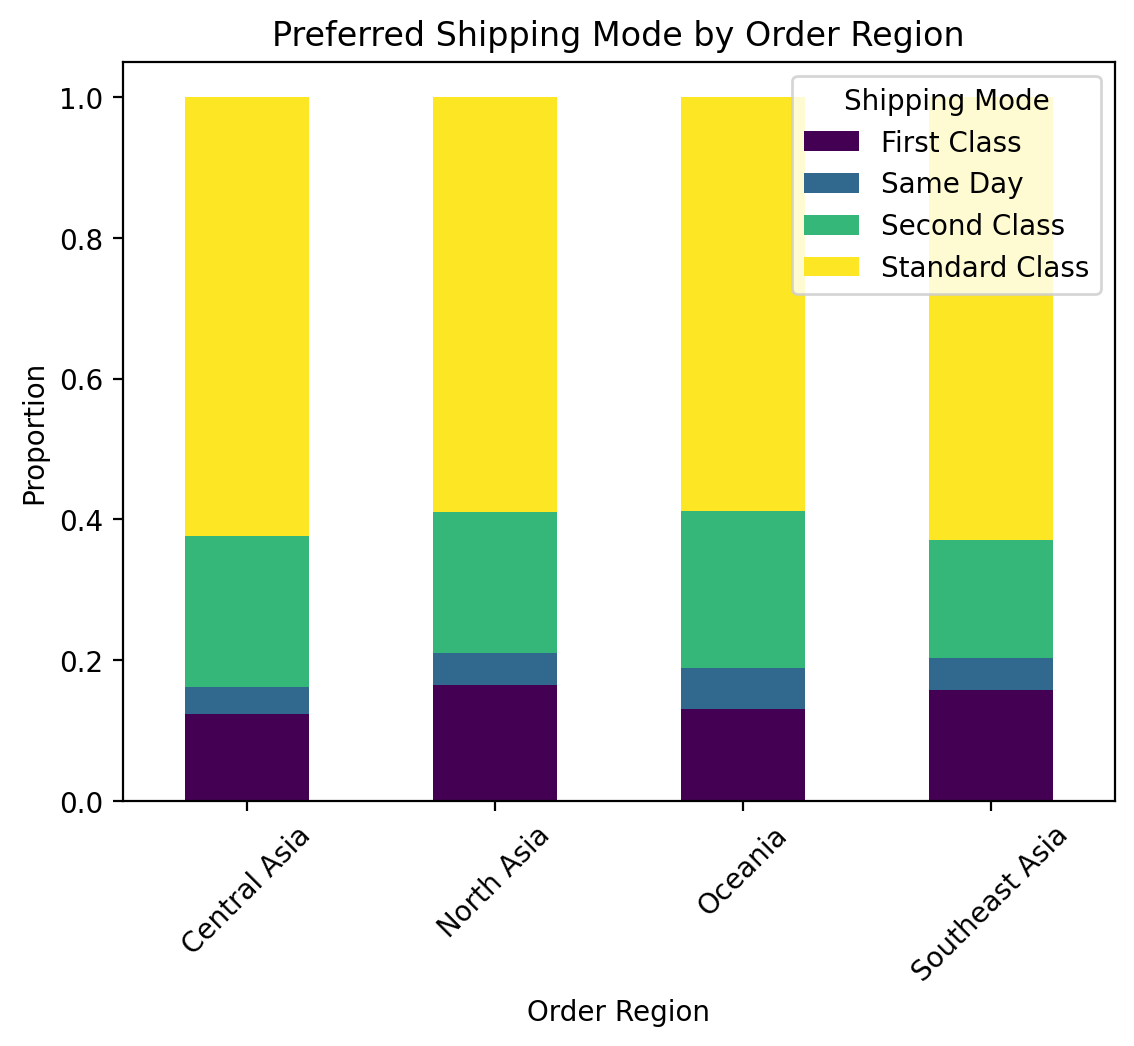

In [ ]:
# 시각화
ship_mode_prop = ship_mode_counts.div(ship_mode_counts.sum(axis=1), axis=0)  # 비율 변환

plt.figure(figsize=(10,6))
ship_mode_prop.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Preferred Shipping Mode by Order Region")
plt.xlabel("Order Region")
plt.ylabel("Proportion")
plt.legend(title="Shipping Mode")
plt.xticks(rotation=45)
plt.show()


p value < 0.05로 지역 별 선호하는 배송 방식의 차이가 있음을 확인, 잔차 분석 실시

In [ ]:
# 잔차 분석 : 임계값 : +-2

# 빈도 테이블
observed = pd.crosstab(df1['order_region'], df1['ship_mode'])

# 기대값 계산
chi2, p, dof, expected = stats.chi2_contingency(observed)

# 표준화 잔차 계산
residuals = (observed - expected) / np.sqrt(expected)

residuals

ship_mode,First Class,Same Day,Second Class,Standard Class
order_region,,,,
Central Asia,-2.505961,-2.063159,1.391725,1.004444
North Asia,2.625040,-0.721320,-0.003002,-1.073623
Oceania,-2.112753,2.721295,2.942968,-1.435582
Southeast Asia,1.988621,-0.580092,-4.230114,1.630913


#### 결론

Same Day > First Class > Second Class > Standard Class 순으로 배송비가 비싸다고 가정

1. 고급 배송(First Class, Same Day)을 선호하는 지역

    North Asia (동북아시아) → First Class 선호

    Oceania (오세아니아) → Same Day 선호

    → 전략: 해당 지역에서 프리미엄 배송 옵션을 강화하고, 빠른 배송과 함께 추가 서비스를 제공

2. 비싼 배송(Same Day, First Class)을 기피하는 지역

    Central Asia (중앙아시아) → Same Day, First Class 모두 비선호
    → 전략: 가격 민감도가 높으므로, 경제적인 배송(Standard Class, Second Class)을 중심으로 프로모션 진행

3. 중간 배송(Second Class)이 거의 사용되지 않는 지역

    Southeast Asia (동남아시아) → Second Class 사용 거의 없음
    → 전략: 프리미엄 배송(First Class) 또는 저렴한 배송(Standard Class) 중심의 차별화된 배송 전략 필요

![스크린샷 2025-02-28 오전 1.52.07.png](attachment:b904c208-d14d-41b2-a7d9-0e31cfe5ee7f.png)

![스크린샷 2025-02-28 오전 1.56.37.png](attachment:7c489e42-e4e7-450d-859e-7f01c54446b3.png)

### 가설 C | 할인률과 이익률(profit/sales) 간에는 상관관계가 존재한다.

지역별 평균 할인률 및 이익률 비교

상관분석 및 회귀분석 수행

In [ ]:
# 이익률 계산 (profit/sales)
df1['profit_margin'] = 100*(df1['profit'] / df1['sales'])

In [ ]:
# 지역별 평균 비교
df1.groupby('order_region')[['profit_margin']].mean()

,profit_margin
order_region,
Central Asia,14.698673
North Asia,17.951985
Oceania,8.350156
Southeast Asia,-7.886966


In [ ]:
import scipy.stats as stats

Correlation between Discount & Profit Margin: -0.7751
P-value: 0.0000


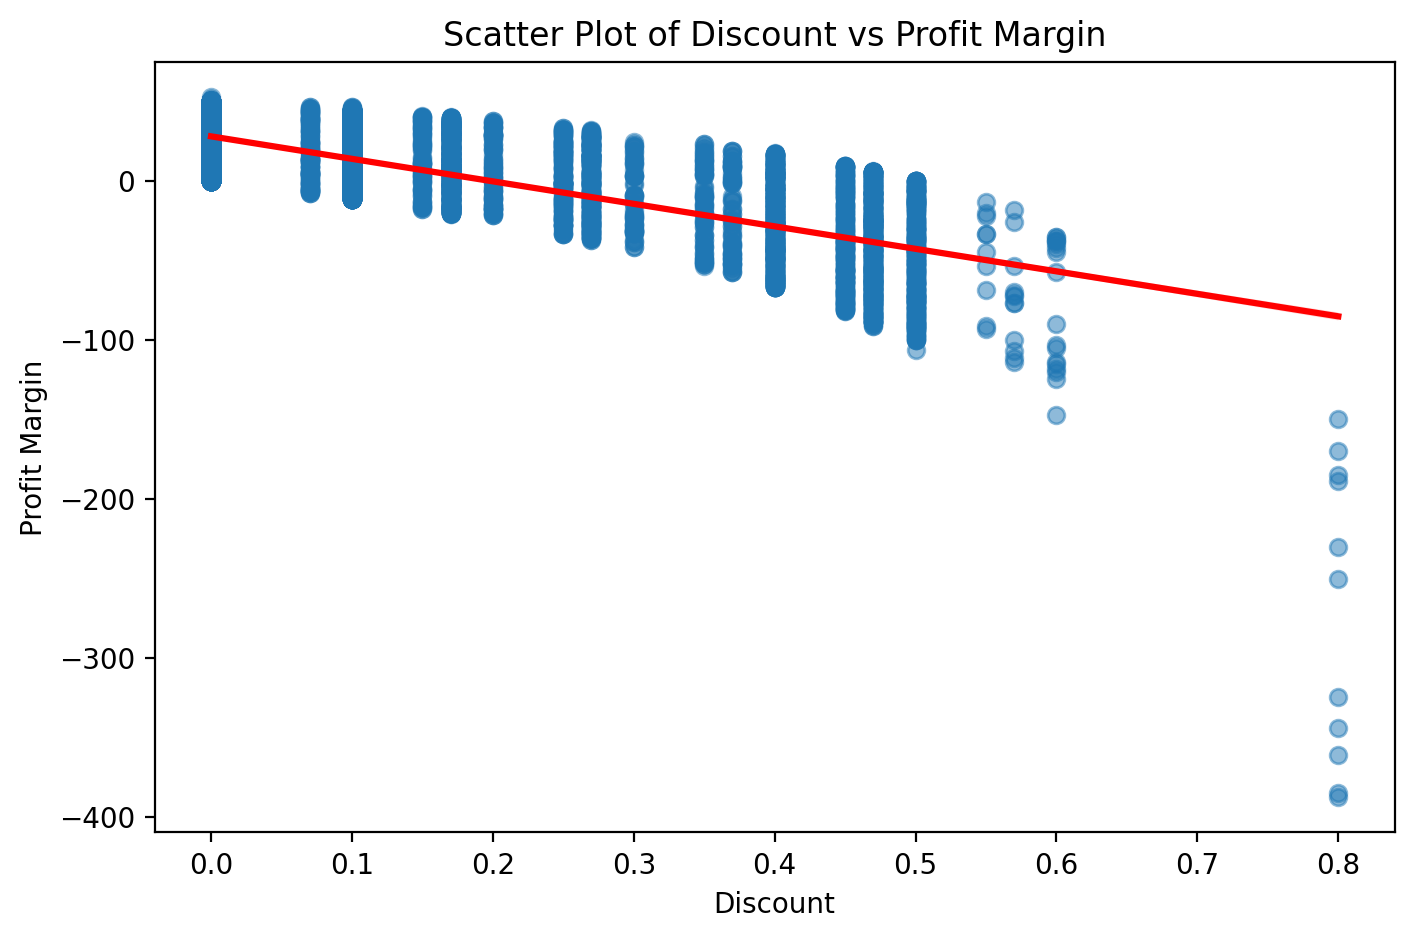

In [ ]:
# 할인율과 이익률간의 상관분석
corr_discount_shipping, p_value = stats.pearsonr(df1['discount'], df1['profit_margin'])

print(f"Correlation between Discount & Profit Margin: {corr_discount_shipping:.4f}")
print(f"P-value: {p_value:.4f}")

# 시각화 (산점도)
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df1,
    x='discount',
    y='profit_margin',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title("Scatter Plot of Discount vs Profit Margin")
plt.xlabel("Discount")
plt.ylabel("Profit Margin")
plt.show()


In [ ]:
# 선형 회귀 분석

# OLS 회귀 분석 모델 생성
dc = df1[['discount']]
pm = df1['profit_margin']
dc = sm.add_constant(dc)  # 절편 추가

# 모델 피팅
model = sm.OLS(pm, dc).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:28:47   Log-Likelihood:                -48760.
No. Observations:               11002   AIC:                         9.752e+04
Df Residuals:                   11000   BIC:                         9.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0237      0.254    110.384      0.0

#### 결론

✔ 할인율이 높아질수록 이익률(profit_margin)은 강하게 감소하는 경향이 있음.

✔ 회귀분셕 결과 통계적으로 매우 유의미한 관계지만, 이익률을 결정하는 다른 요인도 존재할 가능성이 높음.

✔ 할인 정책을 수립할 때, 과도한 할인은 이익을 심각하게 감소시킬 수 있으므로 최적 할인율을 찾는 것이 중요 -> 할인율 최적화 모델 필요

### 가설 D | 운송비와 이익률 간 상관관계가 존재한다.

상관분석 및 회귀분석 수행

 Correlation between Shipping Cost & Profit Margin: 0.0840
 P-value: 0.0000


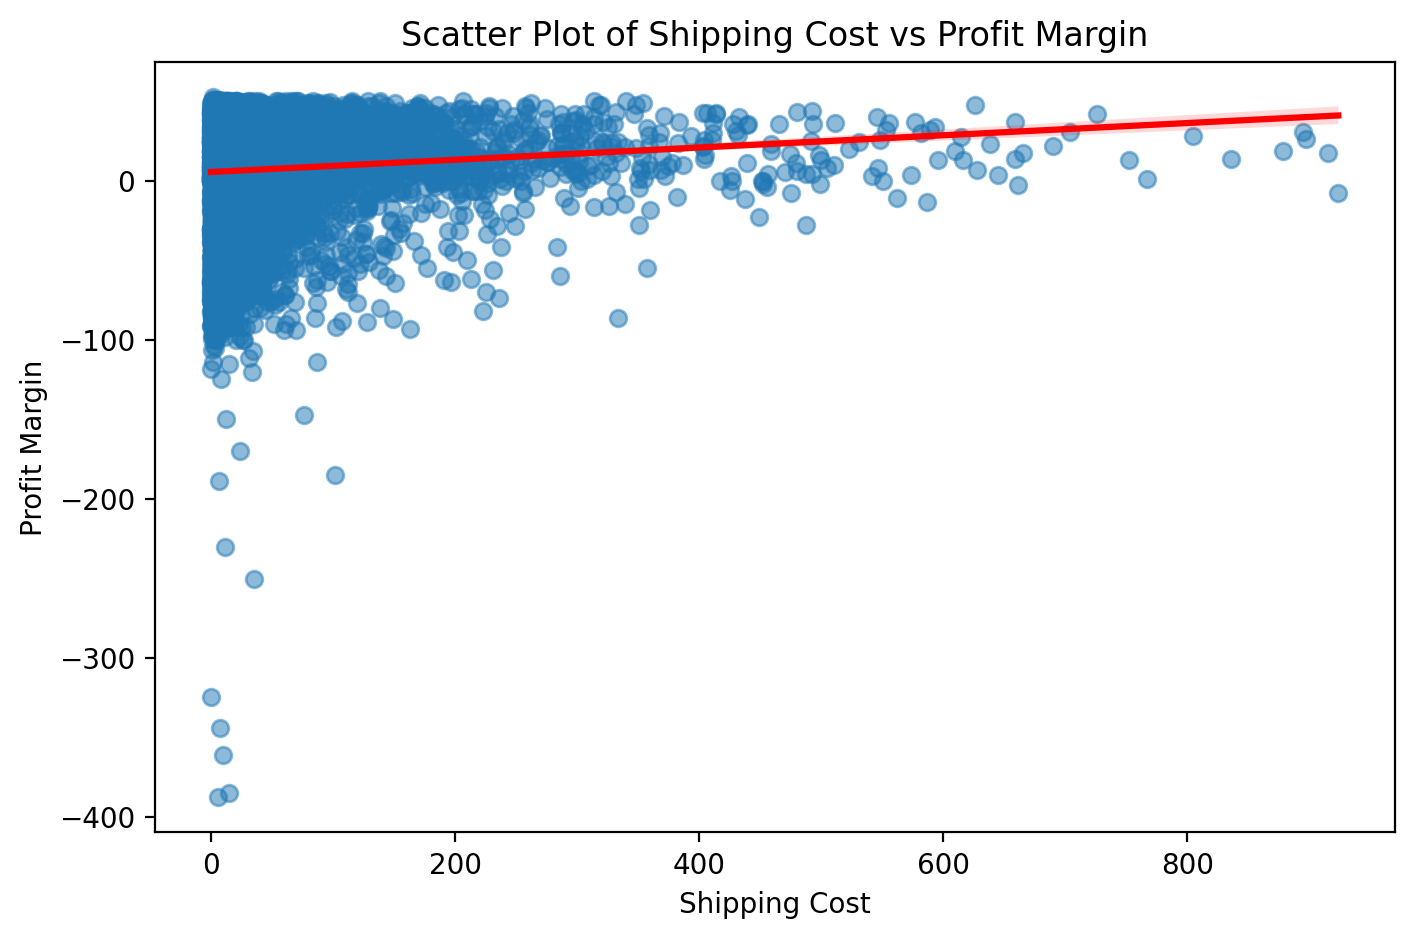

In [ ]:
# 상관계수 계산
corr_shipping_profit, p_value = stats.pearsonr(df1['shipping_cost'], df1['profit_margin'])

print(f" Correlation between Shipping Cost & Profit Margin: {corr_shipping_profit:.4f}")
print(f" P-value: {p_value:.4f}")

# 시각화 (산점도)
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df1,
    x='shipping_cost',
    y='profit_margin',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title("Scatter Plot of Shipping Cost vs Profit Margin")
plt.xlabel("Shipping Cost")
plt.ylabel("Profit Margin")
plt.show()


In [ ]:
# OLS 회귀 분석 모델 생성
sc = df1[['shipping_cost']]
sc = sm.add_constant(sc)  # 절편 추가

# 모델 피팅
model = sm.OLS(pm, sc).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     78.15
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.10e-18
Time:                        19:28:47   Log-Likelihood:                -53773.
No. Observations:               11002   AIC:                         1.075e+05
Df Residuals:                   11000   BIC:                         1.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5996      0.342     16.362

#### 결론

✔ 운송비와 이익률 간의 관계는 거의 없음 (매우 낮은 상관계수, 낮은 설명력)

✔ 즉 운송비 절감이 이익률 증가로 이어지지 않는다.

✔ 이익률을 예측하려면 할인율, 매출, 상품 카테고리, 지역 등의 변수를 포함한 다중 회귀 분석이 필요

### 가설 E | 매출, 운송비, 할인율이 이익률에 미치는 영향 (다중 회귀 분석)

매출, 운송비, 할인율이 이익률에 어떤 영향을 주는지 평가

다중 회귀 분석을 통해 변수 간 관계를 고려하여 종합적인 영향력 측정

독립 변수 간 다중공선성(multicollinearity) 존재 여부도 확인 (Condition Number 참고)

In [ ]:
# 독립 변수 (X)와 종속 변수 (Y) 설정
X = df1[['sales', 'shipping_cost', 'discount']]  # 독립 변수
y = df1['profit_margin']  # 종속 변수

# 상수 추가 (절편 포함)
X = sm.add_constant(X)

# OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     5519.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:28:47   Log-Likelihood:                -48759.
No. Observations:               11002   AIC:                         9.753e+04
Df Residuals:                   10998   BIC:                         9.756e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.2106      0.289     97.601

#### 결론

H0 기각, H1 채택

할인율(discount)은 이익률에 매우 강한 부정적 영향을 미침

매출(sales)과 운송비(shipping_cost)는 이익률에 유의미한 영향을 미치지 않음

모델의 설명력(R² = 0.601)은 높지만, 다중공선성 문제 가능성 존재

✅ 비즈니스 인사이트

- 할인율 조정 필요

    할인율이 증가하면 이익률이 급격히 하락하므로 무분별한 할인 정책을 줄이고, 최적 할인율을 찾아야 함
    -> 고객 세그먼트별 맞춤 할인 전략 필요

- 매출 증대 전략이 단순히 이익률 개선으로 이어지지는 않음

    매출 증가가 이익률 증가로 연결되지 않으므로, 고객 세그먼트 분석을 통해 고수익 고객을 타겟팅해야 함

- 운송비 최적화보다는 매출-이익률 관계를 더 중점적으로 분석해야 함

    운송비 자체는 이익률에 직접적 영향을 주지 않음
    하지만 매출이 높은 지역에서 운송비가 높은 경향이 있으므로, 지역별 이익률 최적화 전략 필요

### 가설 F | 배송 방식 별 매출/이익률/배송비 차이 분석

H0 : 같은 지역 내에서 배송 방식에 따른 배송비, 매출 및 이익률 차이는 존재하지 않는다.

H1 : 같은 지역 내에서 배송 방식에 따른 배송비, 매출 및 이익률 차이가 존재한다.

- 목적

  배송 방식(ship_mode) 에 따른 매출, 운송비, 이익률 차이 분석

  지역(order_region) + 배송 방식(ship_mode) 을 그룹화하여 비교

  통계적 검증(ANOVA) 을 통해 차이가 유의미한지 확인



=== ANOVA for sales by Ship Mode ===
                    sum_sq       df         F    PR(>F)
C(ship_mode)  1.617955e+06      3.0  1.772694  0.150001
Residual      3.345993e+09  10998.0       NaN       NaN




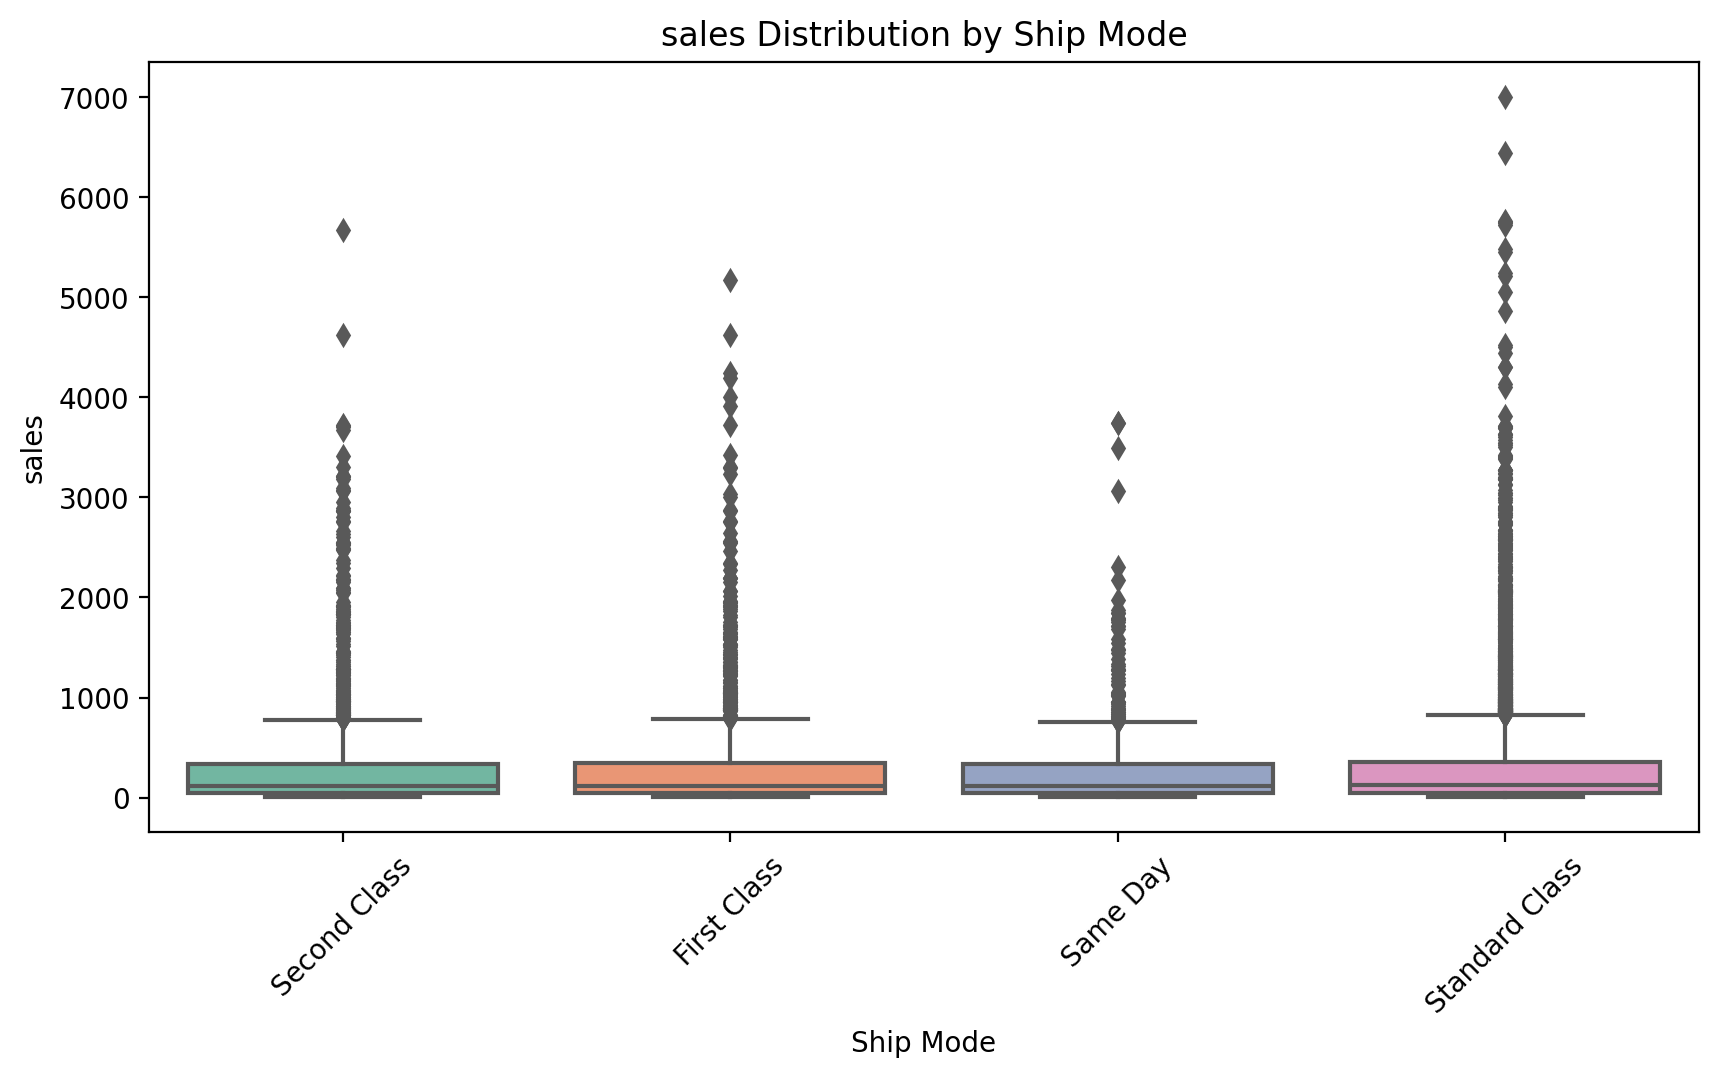

=== ANOVA for profit_margin by Ship Mode ===
                    sum_sq       df         F   PR(>F)
C(ship_mode)  4.525115e+03      3.0  1.454276  0.22492
Residual      1.140710e+07  10998.0       NaN      NaN




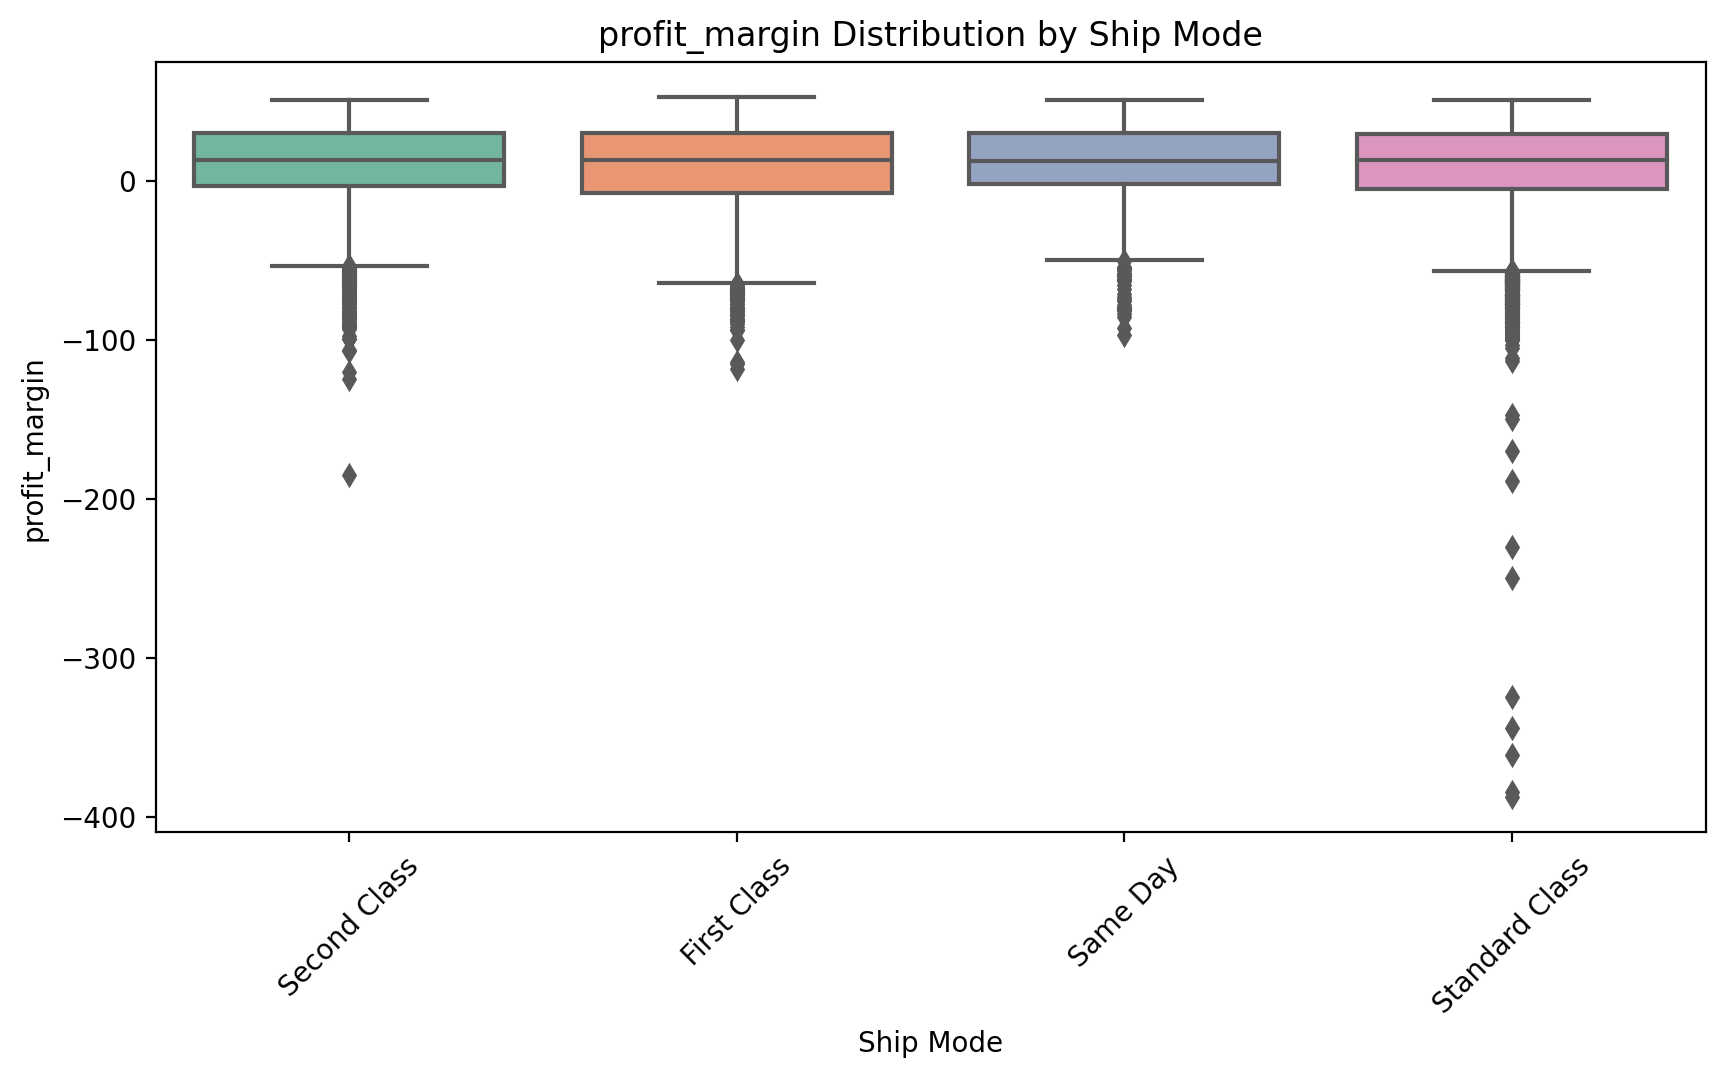

=== ANOVA for shipping_cost by Ship Mode ===
                    sum_sq       df          F        PR(>F)
C(ship_mode)  1.280202e+06      3.0  88.502031  1.385022e-56
Residual      5.302951e+07  10998.0        NaN           NaN




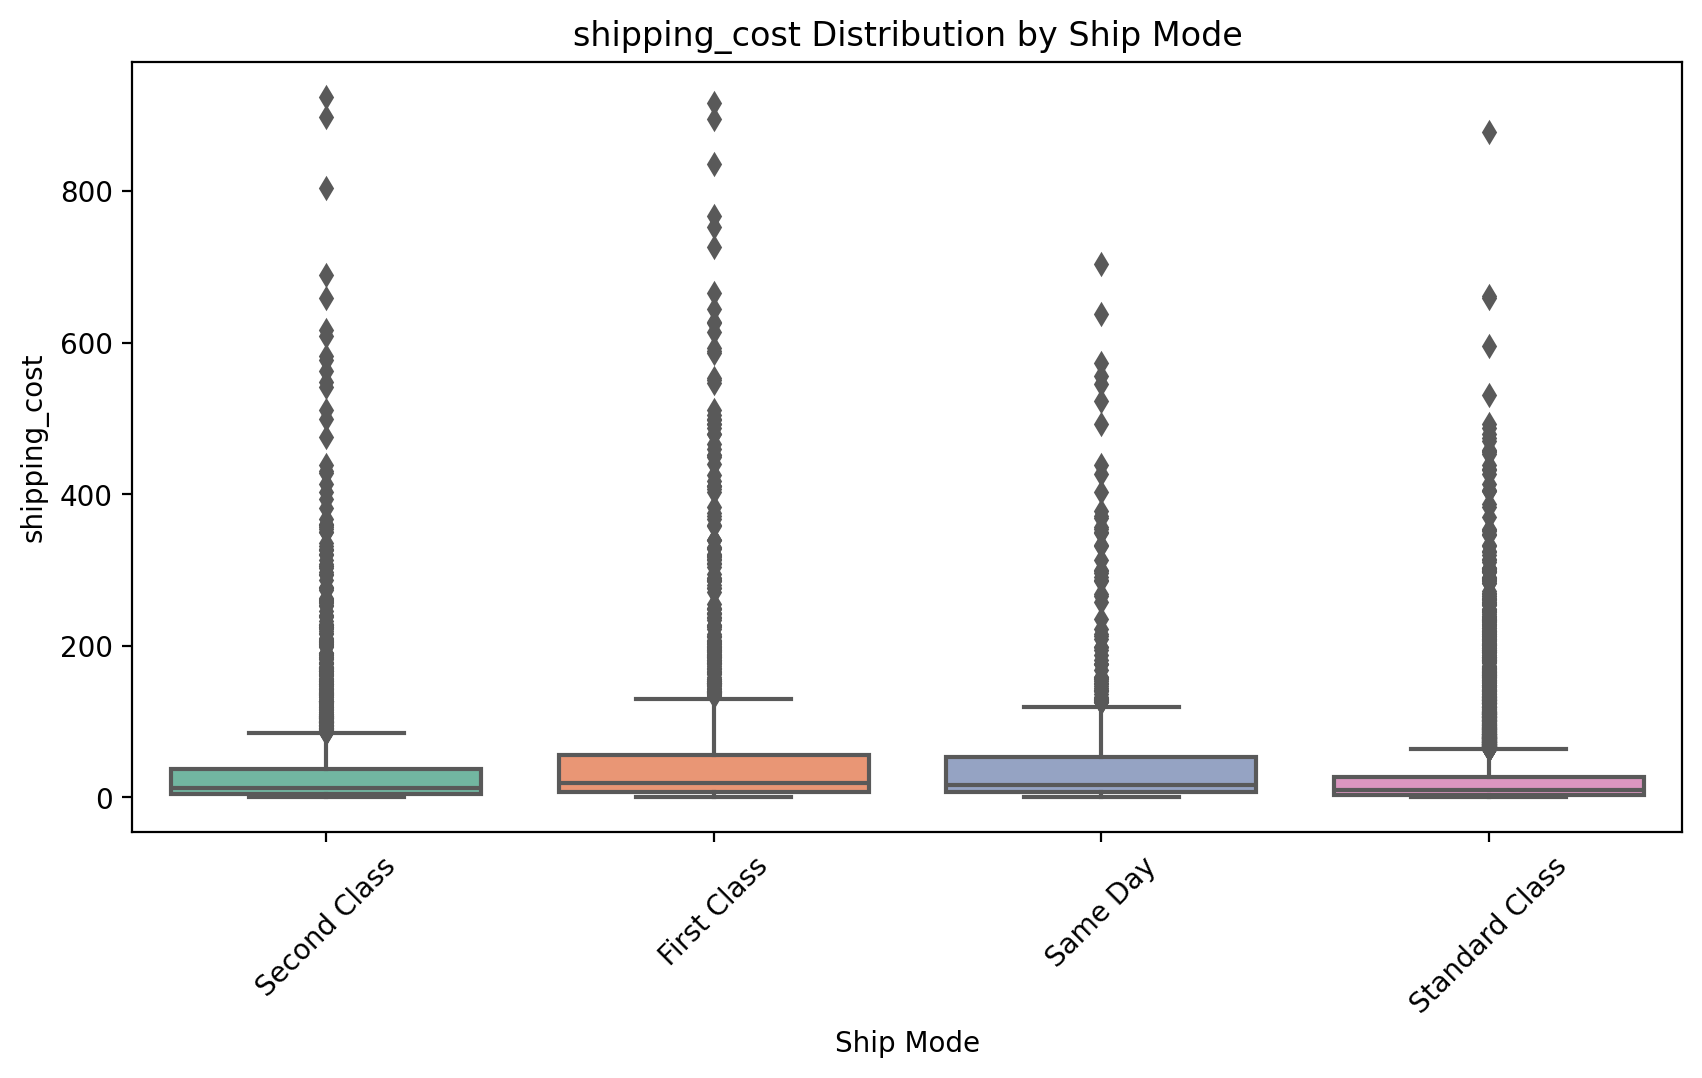

In [ ]:
#  ANOVA (ship_mode에 따른 sales, profit_margin, shipping_cost 차이 분석)
target = ['sales', 'profit_margin', 'shipping_cost']

for var in target:
    print(f"=== ANOVA for {var} by Ship Mode ===")

    # OLS 모델 적합 (배송 방식에 따른 변수 차이 분석)
    model = ols(f'{var} ~ C(ship_mode)', data=df1).fit()

    # ANOVA 테이블 출력
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    print('\n')

    # Boxplot 시각화
    plt.figure(figsize=(10,5))
    sns.boxplot(
        data=df1,
        x='ship_mode',
        y=var,
        palette='Set2'
    )
    plt.title(f"{var} Distribution by Ship Mode")
    plt.xlabel("Ship Mode")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
for var in target:
    if var == 'shipping_cost':  # Shipping cost만 유의미한 차이 있으므로
        print(f"\n=== Post-hoc test (Tukey's HSD) for {var} by Ship Mode ===")
        tukey_result = pairwise_tukeyhsd(df1[var], df1['ship_mode'])
        print(tukey_result)
        print('\n')


=== Post-hoc test (Tukey's HSD) for shipping_cost by Ship Mode ===
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1        group2     meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 First Class       Same Day  -1.4871 0.9736 -10.4082   7.4339  False
 First Class   Second Class -16.6042    0.0 -22.4758 -10.7327   True
 First Class Standard Class -28.1187    0.0 -33.1043 -23.1331   True
    Same Day   Second Class -15.1171    0.0 -23.7131  -6.5211   True
    Same Day Standard Class -26.6316    0.0 -34.6486 -18.6145   True
Second Class Standard Class -11.5145    0.0 -15.8921  -7.1369   True
--------------------------------------------------------------------




#### 결론

- 배송 방식별 매출 차이가 없음 → 특정 배송 모드가 매출을 증가시키거나 감소시키는 직접적인 요인은 아님.

- 배송 방식별 이익률 차이가 없음 → 프리미엄 배송(Same Day 등)이 이익률을 높이거나 낮추지 않음.

- 배송비 차이 존재 → 예상대로 빠른 배송 옵션이 높은 배송비를 유발함

- 인사이트 :

    프리미엄 배송(Same Day, First Class) 가격을 올려도 고객들이 지불할 가능성이 높음.

    Standard Class를 기본 옵션으로 유지하고, 추가 비용을 부과하는 배송 옵션 제공 고려.

    특정 고객군에서 빠른 배송에 대한 수요가 높은지 분석 후, 프리미엄 배송 전략 도입.


지금까지 분석한 내용은 "지역별 특성"에 초점이 맞춰져 있었음.

하지만 같은 지역 내에서도 고객마다 다른 소비 패턴이 있을 것 → 세부적인 맞춤형 전략이 필요함.

따라서 다음 단계로 고객 세분화(Clustering)를 통해 개별 소비 행태를 분석할 필요가 있음.

## 2. 고객 별 구매 행태 분석

목적 : 고객 세분화를 통한 맞춤형 프로모션 제공. 고객별 특성을 파악해 차별화된 마케팅 전략을 수립하고자 한다.

설명 : 고객 별 특성에 다라 중요하게 여기는 피쳐가 다를 것이라 가정, 이를 통한 맞춤형 프로모션 제안, 이익률 개선을 위한 조치

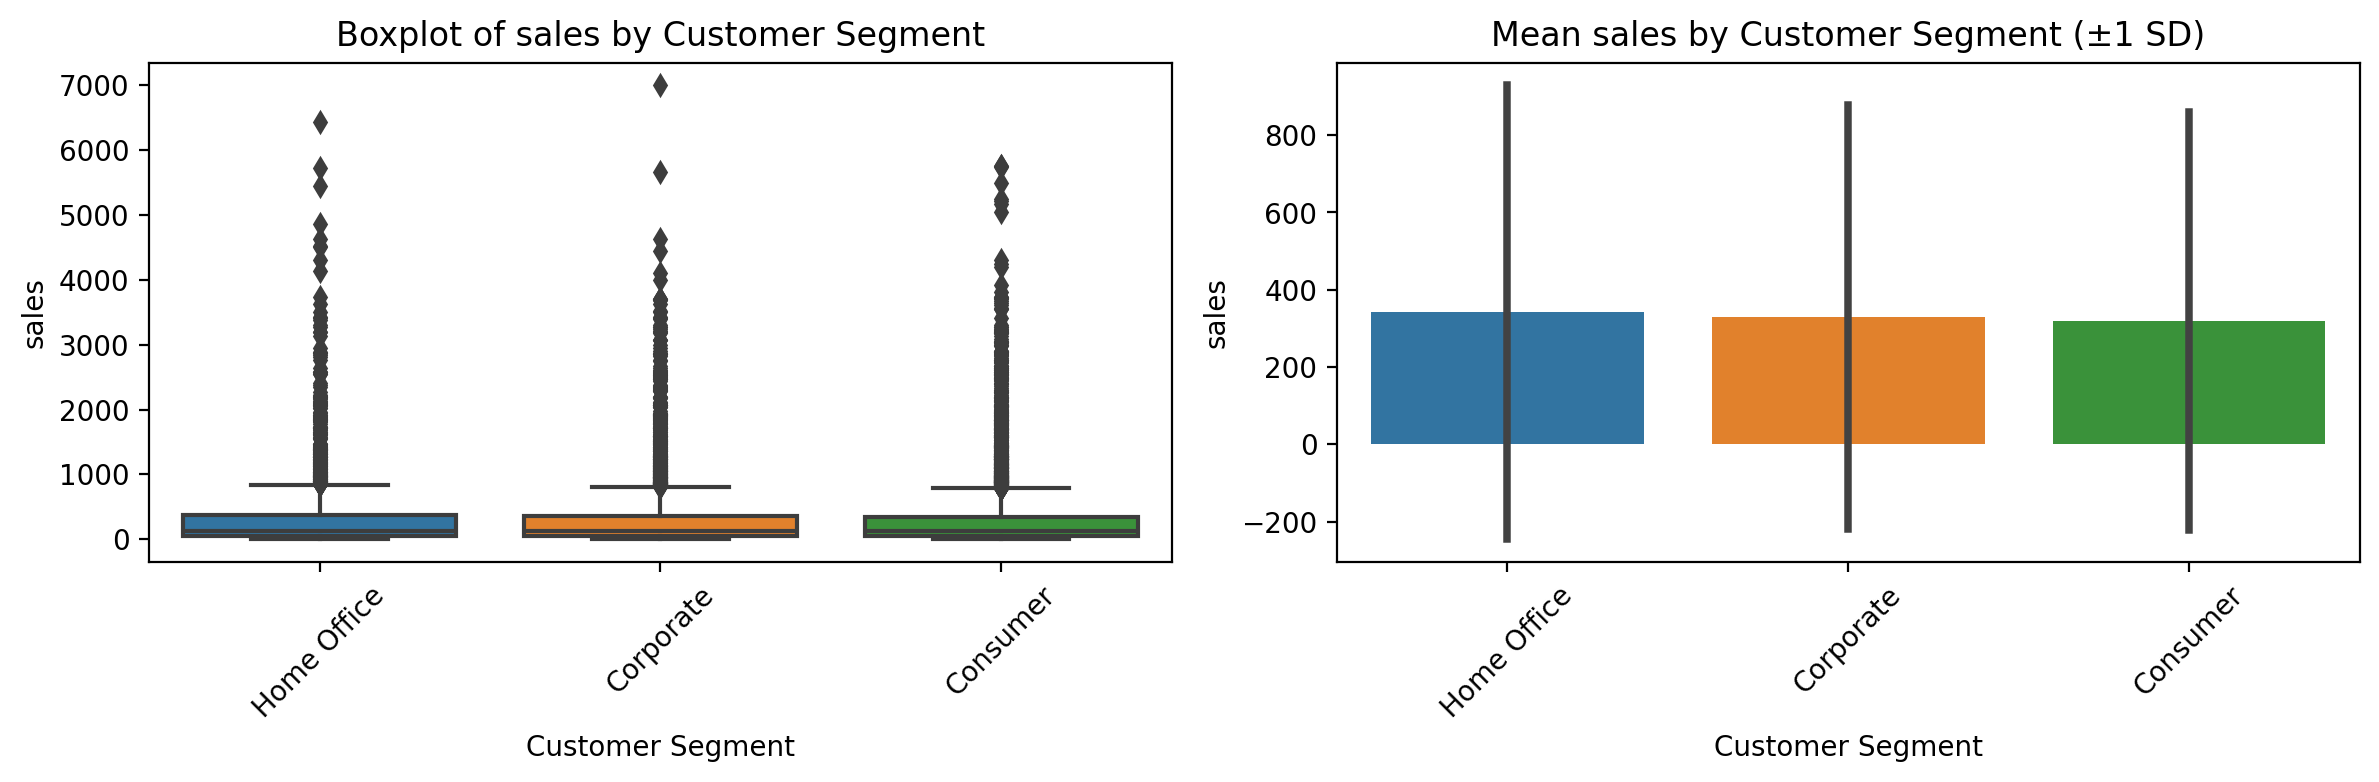

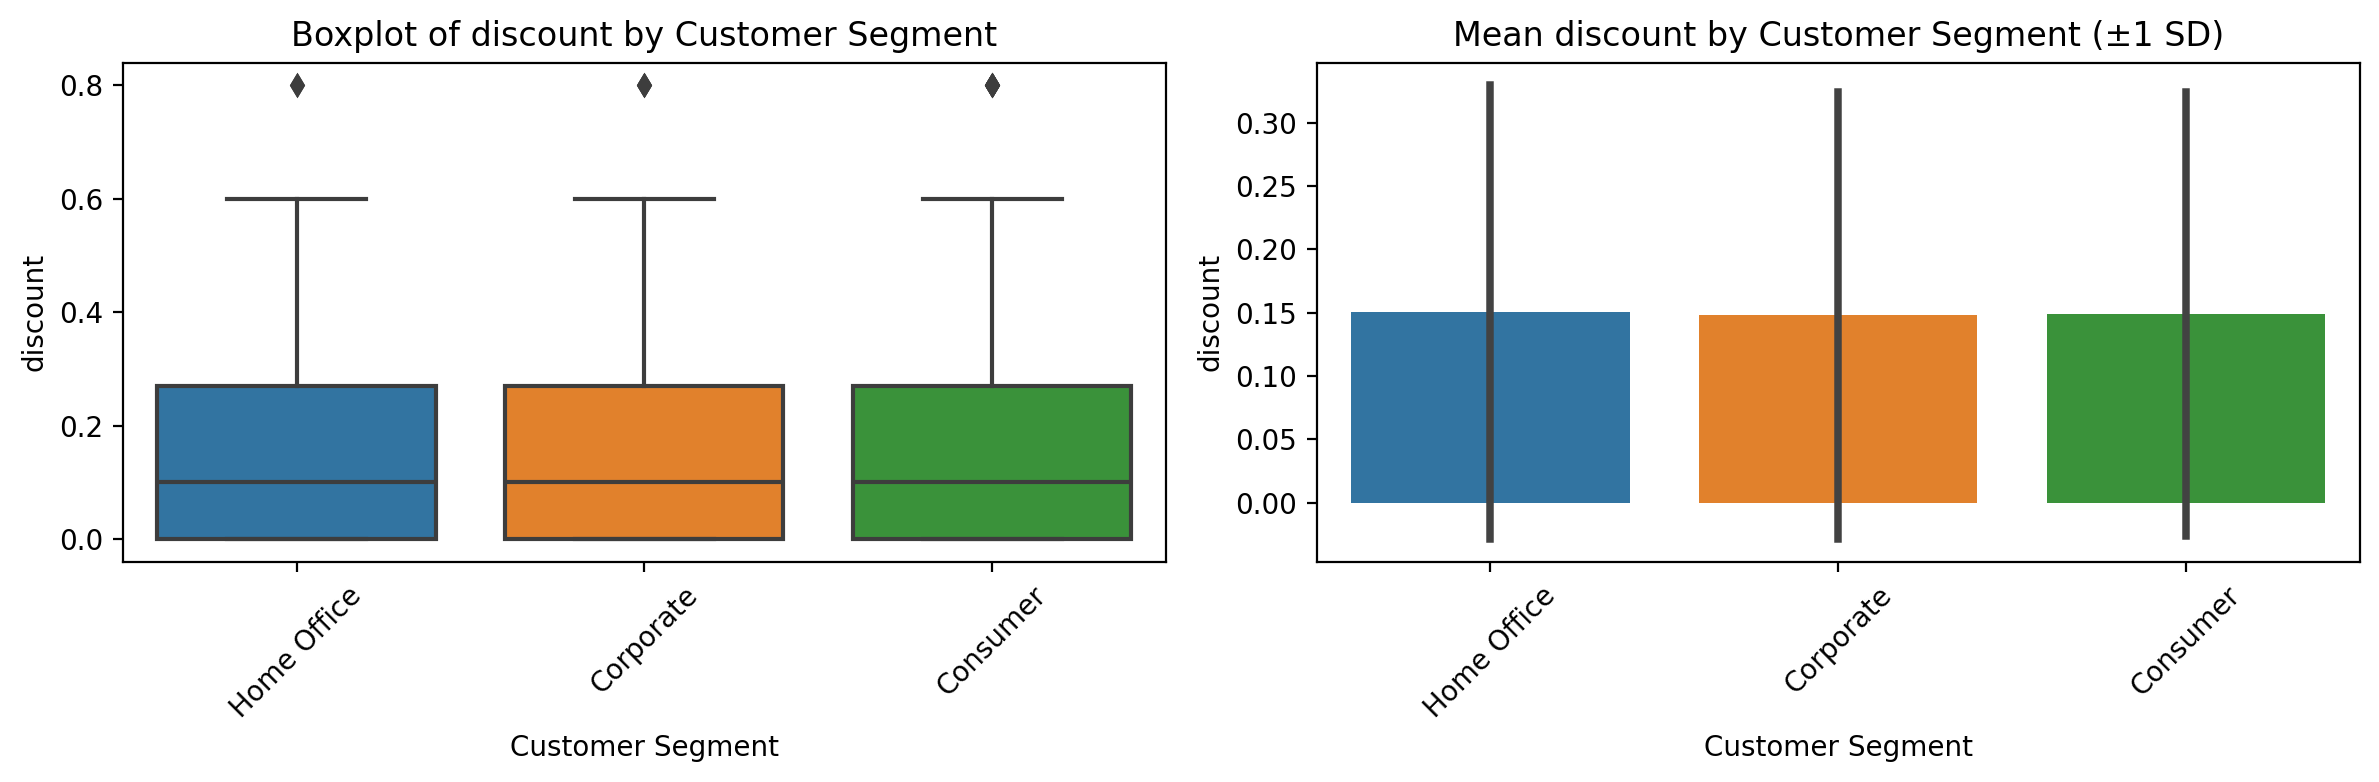

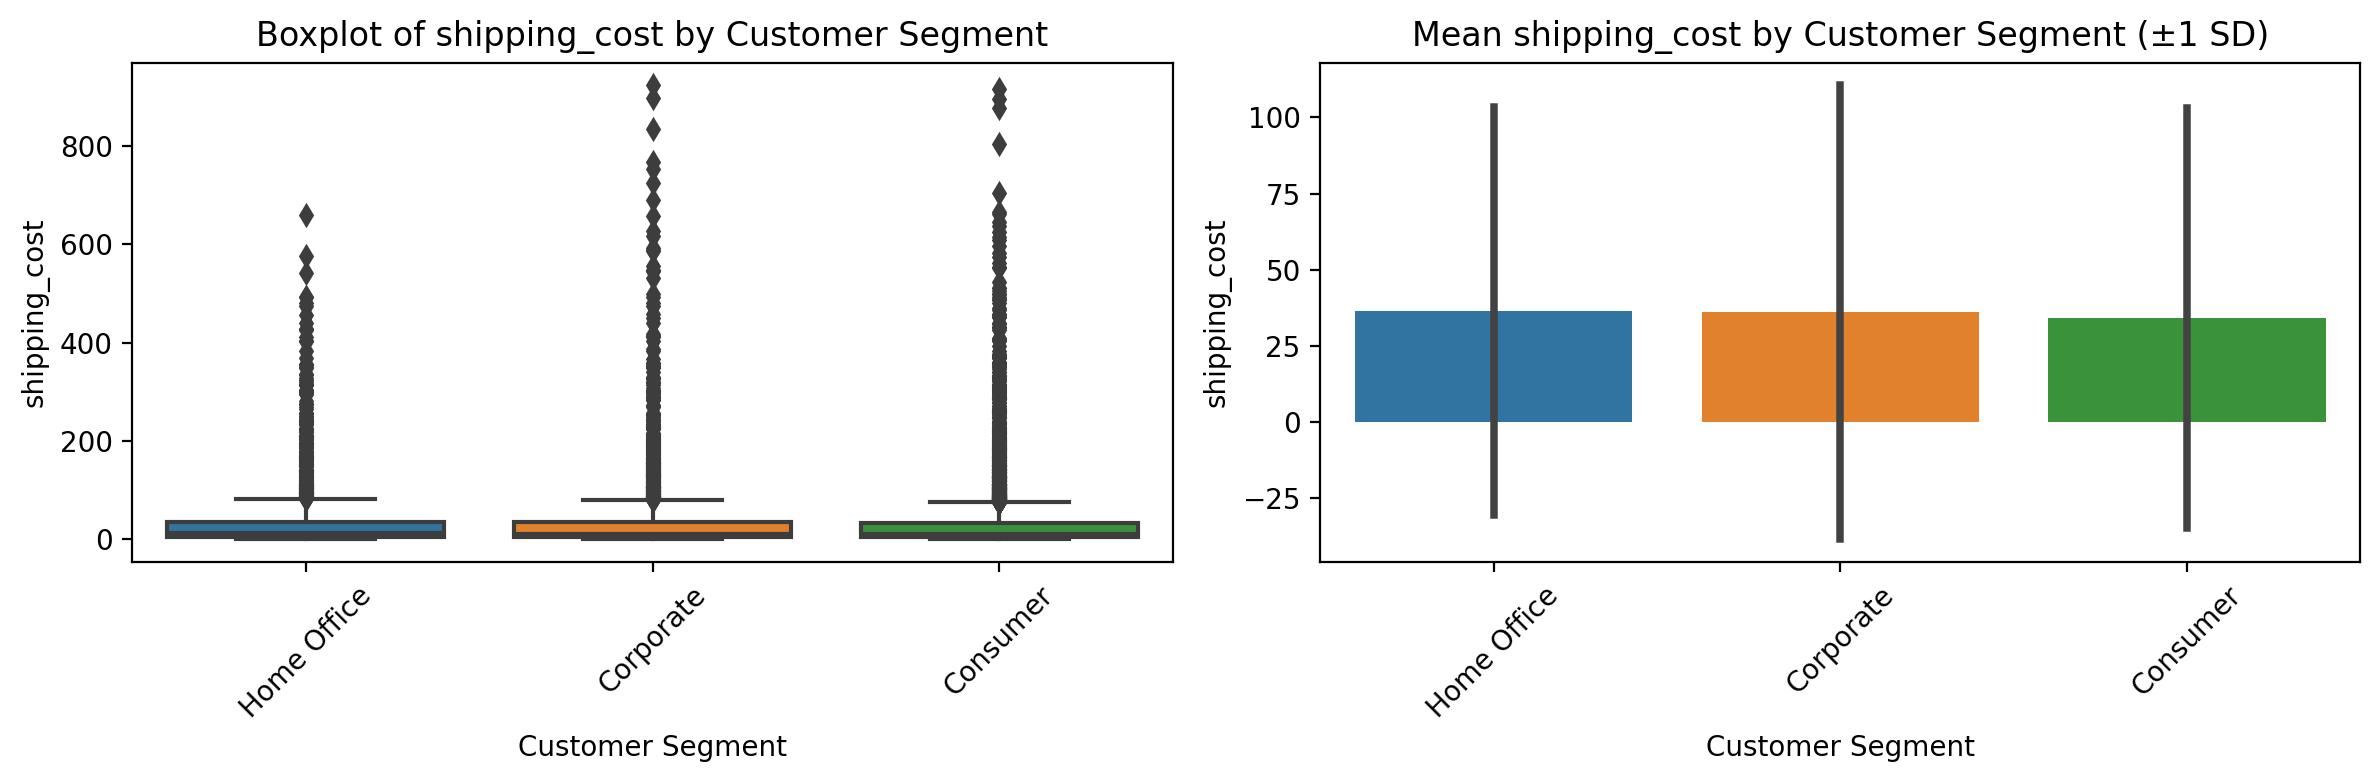

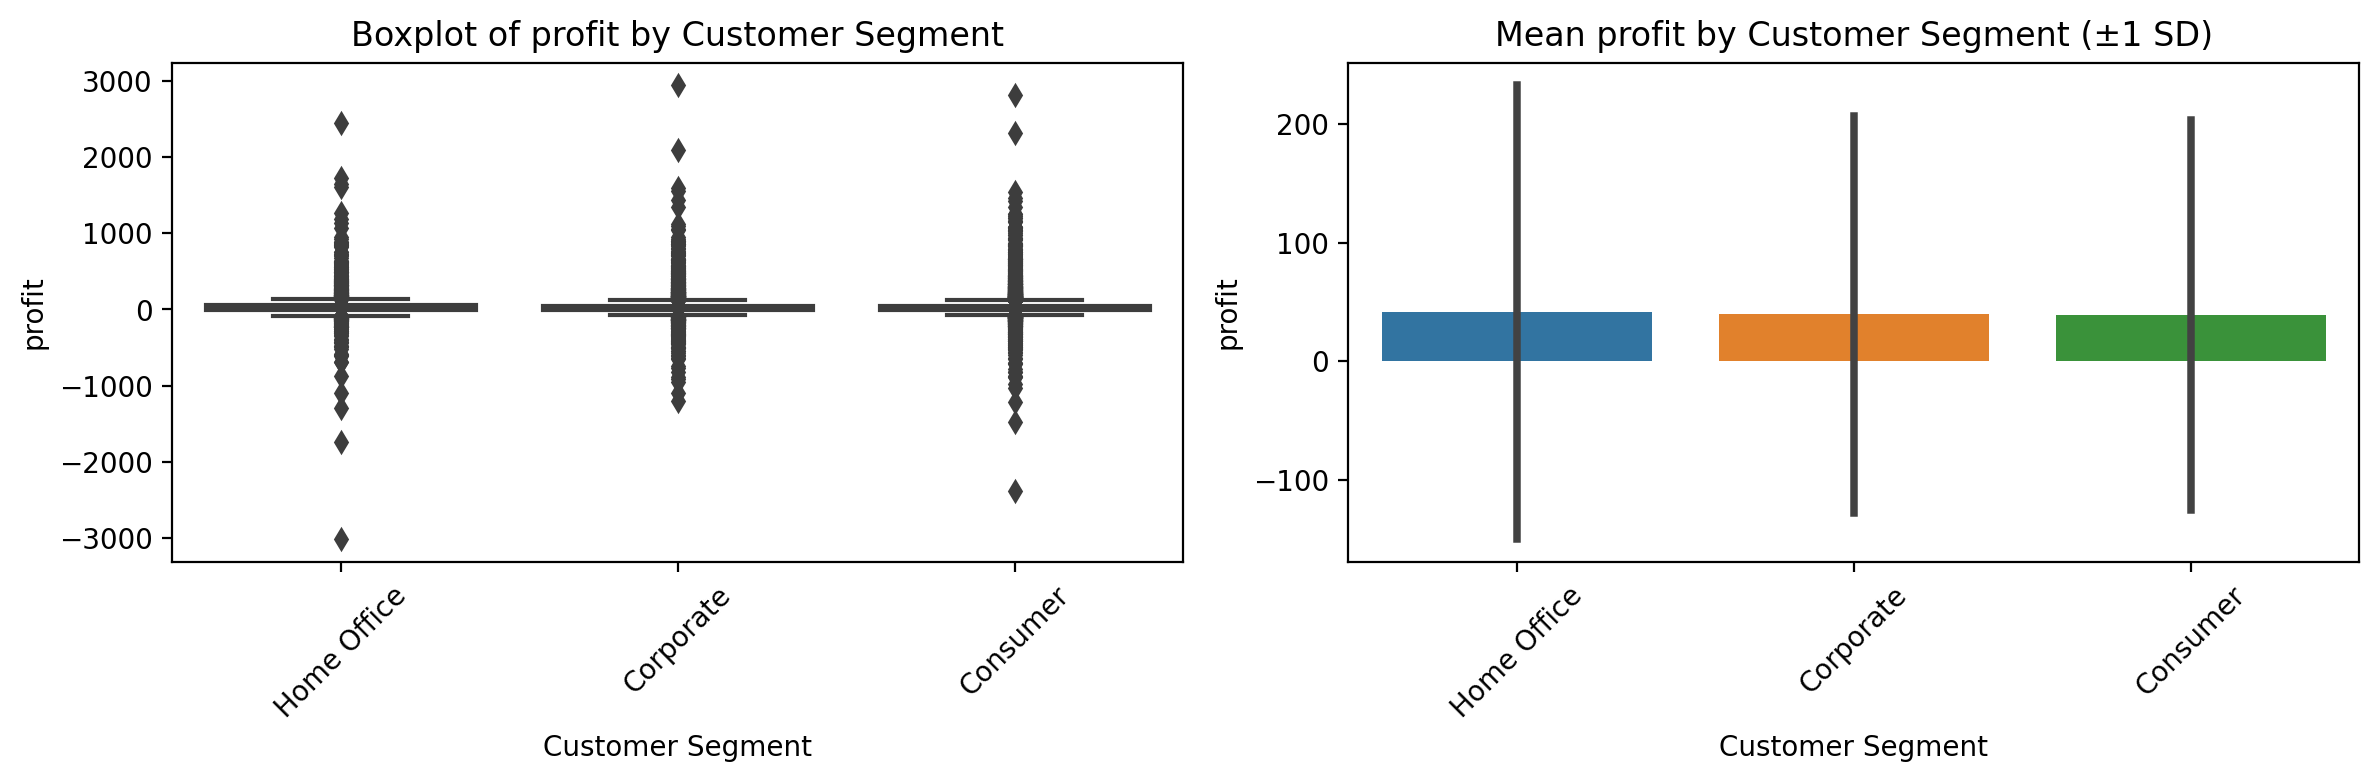

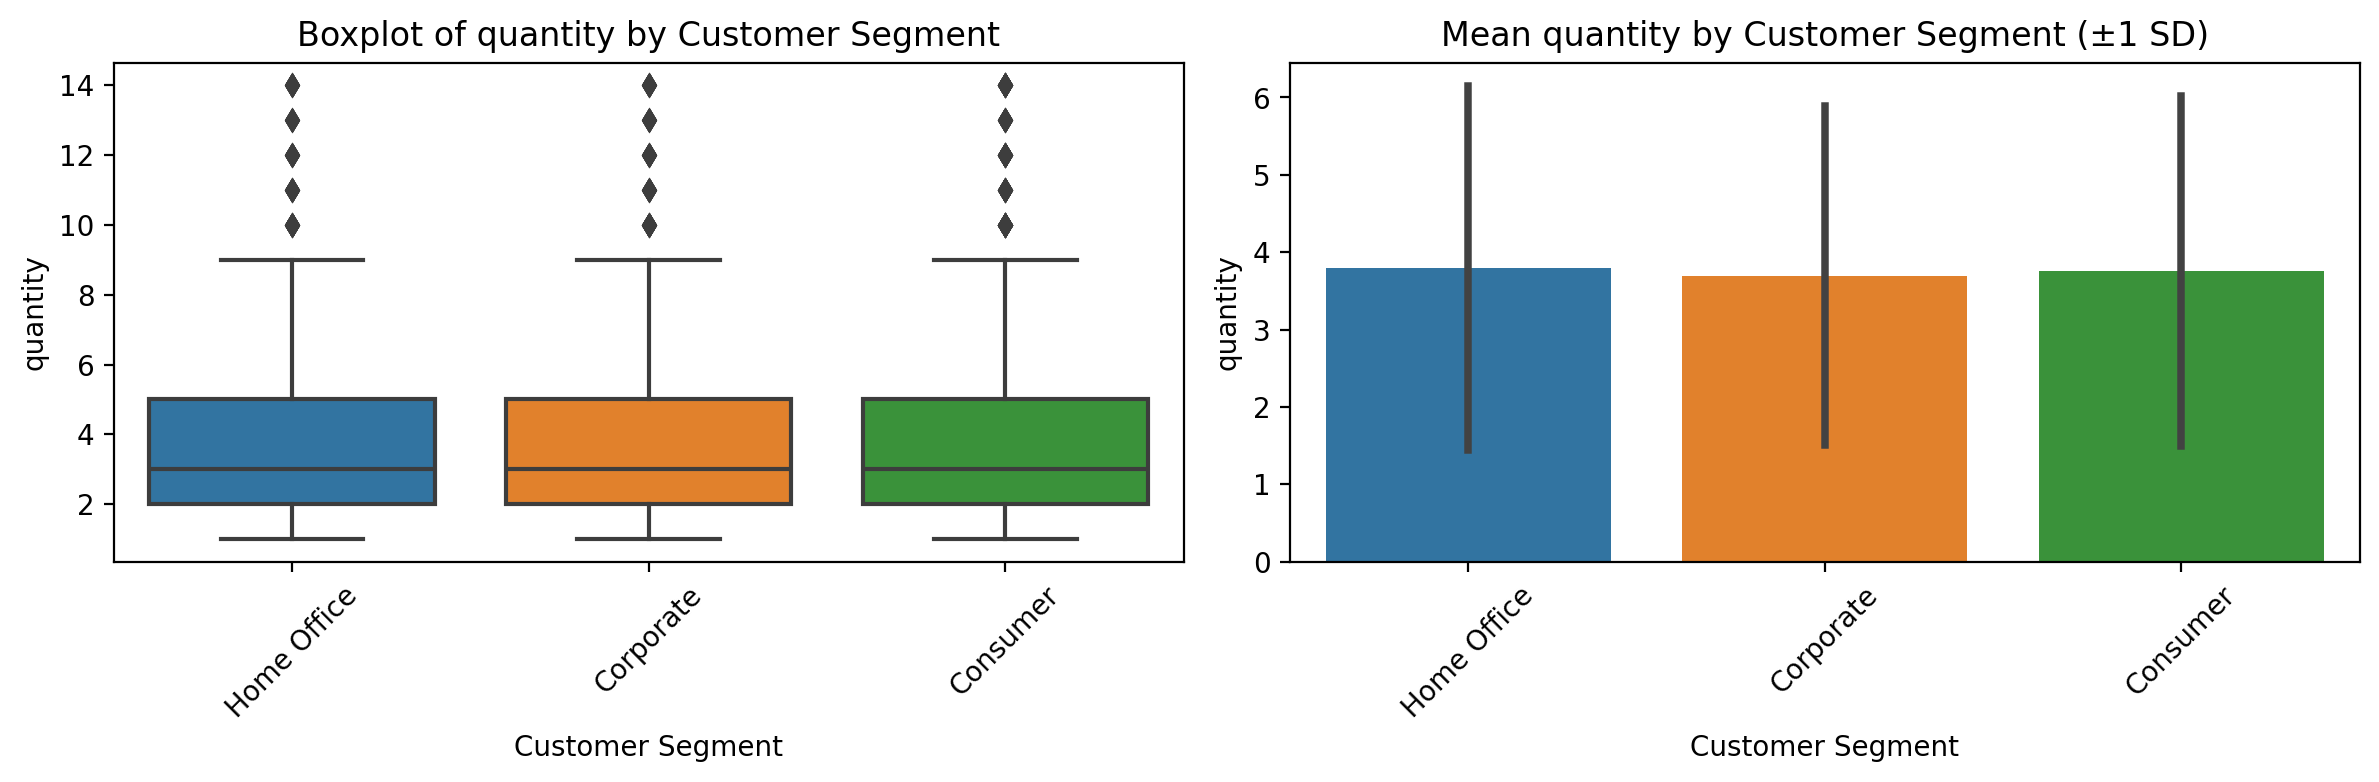

In [ ]:
# 고객 분류 별 매출 변수 분포 확인

for var in target_vars:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # 1) Boxplot (Left)
    sns.boxplot(
        data=df1,
        x='customer_segment',
        y=var,
        ax=axes[0]
    )
    axes[0].set_title(f"Boxplot of {var} by Customer Segment")
    axes[0].set_xlabel("Customer Segment")
    axes[0].set_ylabel(var)
    # x축 라벨 가독성을 위해 회전
    axes[0].tick_params(axis='x', rotation=45)

    # 2) Barplot (Right) - 평균값 + 표준편차 범위(ci='sd')
    sns.barplot(
        data=df1,
        x='customer_segment',
        y=var,
        estimator=np.mean,  # 평균값
        ci='sd',            # 표준편차
        ax=axes[1]
    )
    axes[1].set_title(f"Mean {var} by Customer Segment (±1 SD)")
    axes[1].set_xlabel("Customer Segment")
    axes[1].set_ylabel(var)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# 고객별 매출 비교
print(df1.groupby('customer_segment')[target_vars].mean())

                       sales  discount  shipping_cost     profit  quantity
customer_segment                                                          
Consumer          318.789261  0.148861      34.220190  39.097659  3.757501
Corporate         328.510813  0.147874      36.093506  39.517891  3.698447
Home Office       341.857426  0.150347      36.460035  41.309532  3.797030


유의미한 인사이트 찾기 어려움

### Q1
기본적으로 기업 고객(Corporate)과 개인 고객(Consumer) 같은 고객 세그먼트(customer_segment)가 존재하지만, 과연 이 분류가 실제 구매 행동을 잘 설명할까?

(1) 현재 제공되는 고객 세그먼트 칼럼이 통계적으로 유의한 차이를 보이는지 검정

(2) 만약 유의한 차이가 없다면, 보다 실제적이고 데이터 기반인 세분화를 마련하기 위해 머신러닝(클러스터링)을 시도

### 가설 G | 고객 유형에 따른 차이 검정

H0: 고객 유형에 따른 sales, discount, shipping_cost 등의 평균 차이는 없다.
H1: 고객 유형에 따른 sales, discount, shipping_cost 등의 평균 차이가 존재한다.

In [ ]:
# anova
for var in target_vars:
    print(f"=== ANOVA for {var} by customer_segment ===")
    # (1) OLS 모델
    model = ols(f'{var} ~ C(customer_segment)', data=df1).fit()

    # (2) ANOVA 테이블
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    print('\n')

=== ANOVA for sales by customer_segment ===
                           sum_sq       df         F    PR(>F)
C(customer_segment)  8.248988e+05      2.0  1.355489  0.257864
Residual             3.346786e+09  10999.0       NaN       NaN


=== ANOVA for discount by customer_segment ===
                         sum_sq       df         F    PR(>F)
C(customer_segment)    0.007651      2.0  0.122985  0.884278
Residual             342.149626  10999.0       NaN       NaN


=== ANOVA for shipping_cost by customer_segment ===
                           sum_sq       df         F    PR(>F)
C(customer_segment)  1.129831e+04      2.0  1.144325  0.318477
Residual             5.429842e+07  10999.0       NaN       NaN


=== ANOVA for profit by customer_segment ===
                           sum_sq       df         F    PR(>F)
C(customer_segment)  7.354344e+03      2.0  0.126443  0.881225
Residual             3.198679e+08  10999.0       NaN       NaN


=== ANOVA for quantity by customer_segment ===
       

#### 결론

- 고객 분류 별 매출, 할인율, 배송비, 이익, 수량의 차이는 존재하지 않음

- 사전에 정의된 세그먼트(Consumer/Corporate/Home Office)만으로는 구매 행태의 유의미한 차이를 설명하기 어렵다.

### 가설 H | 고객 세그먼트별 선호 배송 형태 분석

특정 고객군은 특정 배송 방식을 선호할 것이다

- 카이제곱 검정 수행

- H0: 고객 세그먼트(Consumer, Corporate, Home Office)에 따라 배송 방식 선호도에 차이가 없다.

- H1: 고객 세그먼트에 따라 특정 배송 방식을 선호하는 경향이 존재한다.

In [ ]:
# 고객 세그먼트별 배송 방식 빈도 테이블
cross_tab = pd.crosstab(df1['customer_segment'], df1['ship_mode'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square Statistic: 2.7441
P-value: 0.8402


<Figure size 1000x600 with 0 Axes>

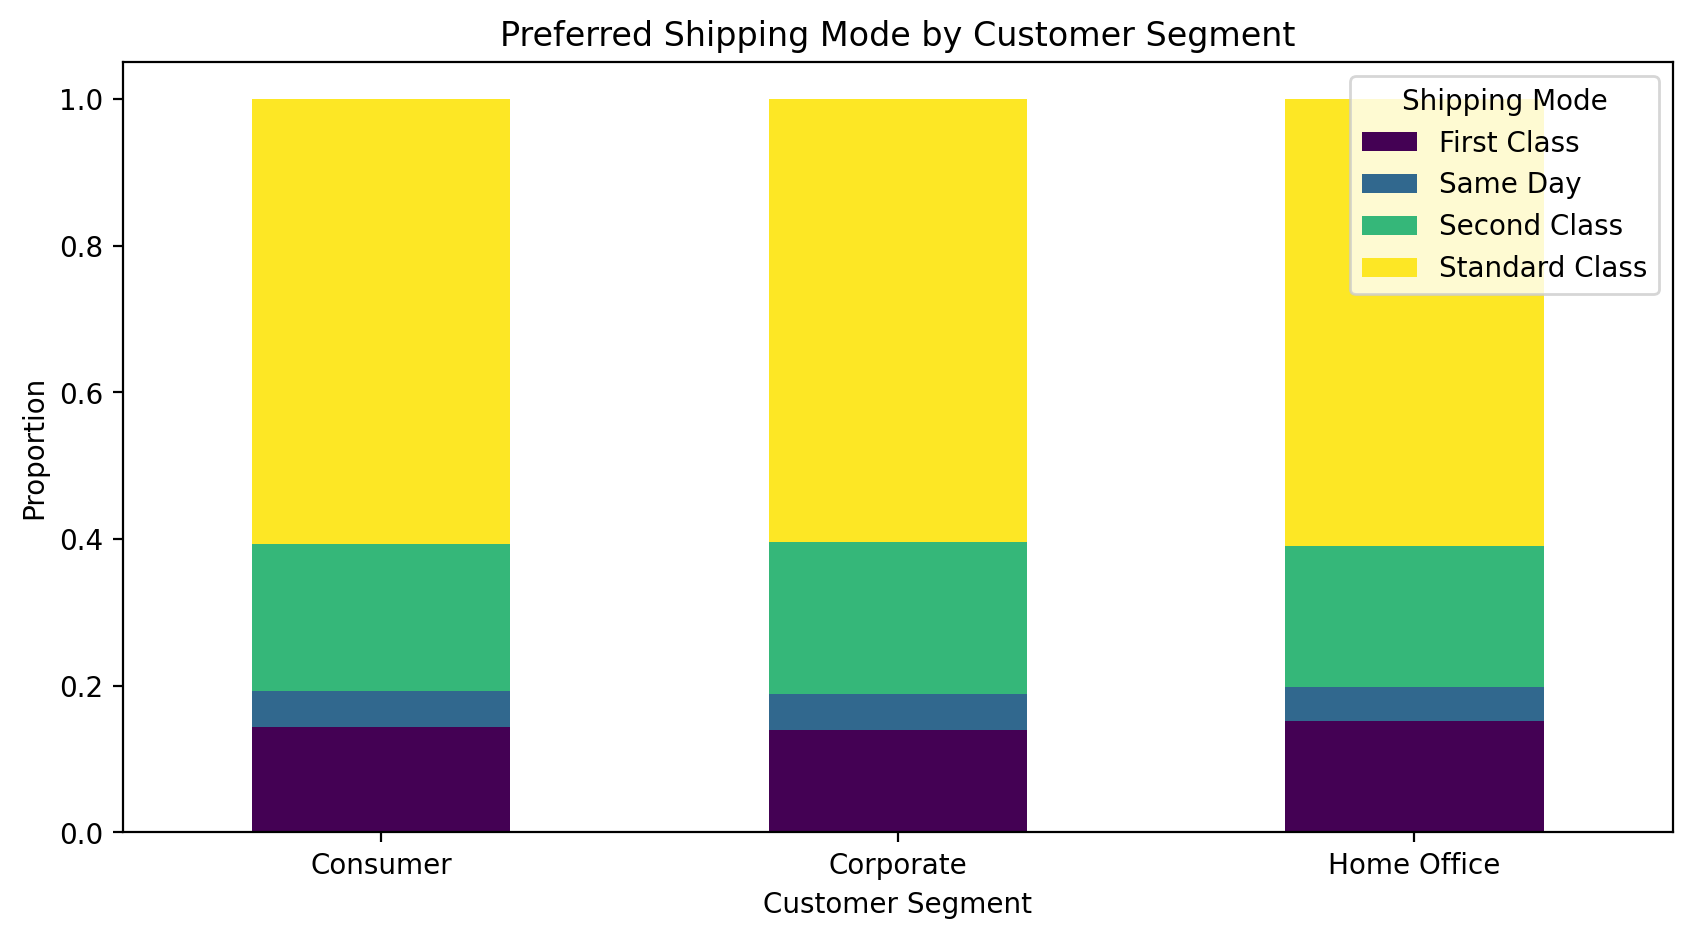

In [ ]:
# 시각화
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)  # 비율 변환

plt.figure(figsize=(10,6))
cross_tab_norm.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,5))
plt.title("Preferred Shipping Mode by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Shipping Mode")
plt.show()


#### 결론

- 고객 세그먼트에 따른 배송 방식 차이가 거의 없음

# EDA 결론

지금까지 APAC 내 4개 지역(Central Asia, North Asia, Southeast Asia, Oceania)의 차이점과 고객 세그먼트(Consumer, Corporate, Home Office) 분석을 독립적으로 수행했다. 하지만, 지역별 소비 패턴과 고객의 소비 성향은 밀접한 연관이 있을 가능성이 높다.

예를 들어 동남아시아(Southeast Asia)는 할인율이 높고, 이익률이 낮은 시장이었고, 동북아시아(North Asia)는 정반대의 패턴(높은 매출 & 낮은 할인율)을 보였다.
그렇다면 이러한 지역적 차이가 특정 고객 군집의 행동 패턴에도 영향을 미칠 수 있을까?

이를 검증하기 위해 지역 분석과 고객 클러스터링을 통합하여 새로운 고객 세그먼트를 정의하는 방향으로 확장할 필요가 있다.

1️⃣ 기존 분석 정리: 지역별 소비 패턴 차이

✅ 할인율 & 매출(AOV) 비교

동남아시아(Southeast Asia) → 할인율 높음, 매출 낮음

동북아시아(North Asia) → 할인율 낮음, 매출 높음

✅ 배송비 & 이익률 비교

동북아시아 → 배송비 가장 높음, 이익률 가장 높음

동남아시아 → 배송비 가장 낮음, 이익률 가장 낮음

✅ 배송 방식 차이 분석

배송 방식(Ship Mode)은 지역 차이에 영향을 받았지만, 고객 세그먼트(Consumer, Corporate, Home Office) 차이는 미미

2️⃣ 기존 고객 세그먼트(Customer Segment)의 한계

매출, 할인율, 이익률, 배송비 모두 고객 세그먼트(Consumer, Corporate, Home Office) 간 차이가 유의미하지 않음

고객의 소비 성향은 기존 카테고리가 아닌, 다른 기준(예: 지역, 할인율, 구매 패턴 등)으로 더 잘 설명될 가능성

3️⃣ 지역 기반 고객 클러스터링(K-Means) 도입

✅ 새로운 접근 방식: 고객 세분화 + 지역별 특성 고려

기존 고객 세그먼트 대신, K-Means 클러스터링을 활용한 데이터 기반 고객 군집 분석 수행

클러스터별 고객 행동 패턴이 지역적 특성과 연관이 있는지 확인

#### 📌 스토리라인: 지역 & 고객 통합 분석 → 머신러닝 기반 맞춤형 전략 수립

✅ Step 1: 지역별 소비 패턴 분석 → APAC 내 4개 지역 차이 확인 (매출, 할인, 배송비, 이익률)

✅ Step 2: 기존 고객 세그먼트 분석 → 유의미한 차이 없음 → 데이터 기반 클러스터링 필요

✅ Step 3: K-Means 군집 분석 (고객 세분화)

✅ Step 4: 고객 클러스터 vs 지역 특성 비교

지역별 클러스터 분포 분석 → 특정 클러스터가 특정 지역에서 집중되는지 확인

클러스터별 주요 소비 패턴 분석 (할인율, 매출, 배송비, 주문 횟수 등)

✅ Step 5: 머신러닝 기반 최적 할인율 예측 → 할인 프로모션 전략 수립

# Modeling 1 | 클러스터링/해석

- K-means Clustering

- Random Forest

## K-means Clustering

In [ ]:
# 라이브러리 임포트
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# 고객별 집계 데이터 생성
df_customer = df1.groupby('customer_id').agg({
    'sales': 'sum',             # 총 매출
    'discount': 'mean',         # 평균 할인율
    'shipping_cost': 'mean',    # 평균 배송비
    'profit': 'sum',            # 총 이익
    'quantity': 'sum',          # 총 주문량
    'order_date': 'nunique'     # 주문 횟수 (중복 없는 날짜 수)
}).reset_index()

# 컬럼명 변경
df_customer.rename(columns={'sales': 'total_sales',
                            'discount': 'avg_discount',
                            'shipping_cost': 'avg_shipping_cost',
                            'profit': 'total_profit',
                            'quantity': 'total_qty',
                            'order_date': 'order_count'}, inplace=True)

In [ ]:
# 고객별 카테고리별 매출 비율 계산
pivot_cat = pd.pivot_table(df1, index='customer_id', columns='category', values='sales', aggfunc='sum', fill_value=0)
pivot_cat = pivot_cat.div(pivot_cat.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)

# 배송 모드별 주문 비율 계산
pivot_ship = pd.pivot_table(df1, index='customer_id', columns='ship_mode', values='order_date', aggfunc='count', fill_value=0)
pivot_ship = pivot_ship.div(pivot_ship.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)


In [ ]:
# 지역별 원핫 인코딩 수행
region_ohe = pd.get_dummies(df1[['customer_id', 'order_region']], columns=['order_region'])
region_ohe = region_ohe.groupby('customer_id').sum().reset_index()

In [ ]:
# 모든 데이터 병합
df_customer = df_customer.merge(pivot_cat, on='customer_id', how='left')
df_customer = df_customer.merge(pivot_ship, on='customer_id', how='left')
df_customer = df_customer.merge(region_ohe, on='customer_id', how='left')

# 고객 ID 제거 (군집화에는 필요 없음)
df_customer.drop(columns=['customer_id'], inplace=True)

In [ ]:
df_customer

,total_sales,avg_discount,avg_shipping_cost,total_profit,total_qty,order_count,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class,order_region_Central Asia,order_region_North Asia,order_region_Oceania,order_region_Southeast Asia
0,1445,0.270000,13.320000,12.8760,44,5,0.413841,0.485813,0.100346,0.400000,0.000000,0.000000,0.600000,2,0,2,6
1,2407,0.066667,27.976667,577.9350,35,4,0.467802,0.532198,0.000000,0.000000,0.000000,0.555556,0.444444,6,0,3,0
2,5946,0.205000,115.996667,601.3884,21,5,0.000000,0.090481,0.909519,0.166667,0.000000,0.000000,0.833333,0,0,1,5
3,5264,0.160000,28.627083,1578.0795,91,12,0.321998,0.283625,0.394377,0.291667,0.250000,0.166667,0.291667,6,1,2,15
4,10662,0.189394,53.731515,1772.7075,128,9,0.428625,0.123898,0.447477,0.151515,0.060606,0.181818,0.606061,6,2,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,3705,0.111333,23.024000,743.1366,42,7,0.381377,0.115520,0.503104,0.066667,0.000000,0.400000,0.533333,0,4,10,1
792,5606,0.095000,54.160000,1315.5801,25,4,0.787549,0.156440,0.056011,0.000000,0.000000,0.166667,0.833333,2,2,1,1
793,3547,0.120000,56.820000,-409.5300,22,4,0.386524,0.034677,0.578799,0.000000,0.000000,0.200000,0.800000,3,1,1,0
794,7448,0.107333,44.227333,1901.2377,68,7,0.033700,0.140575,0.825725,0.000000,0.000000,0.200000,0.800000,7,1,4,3


In [ ]:
# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_customer)

In [ ]:
# 최적 K값 탐색 (Elbow Method & Silhouette Score)
inertias = []
silhouettes = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))


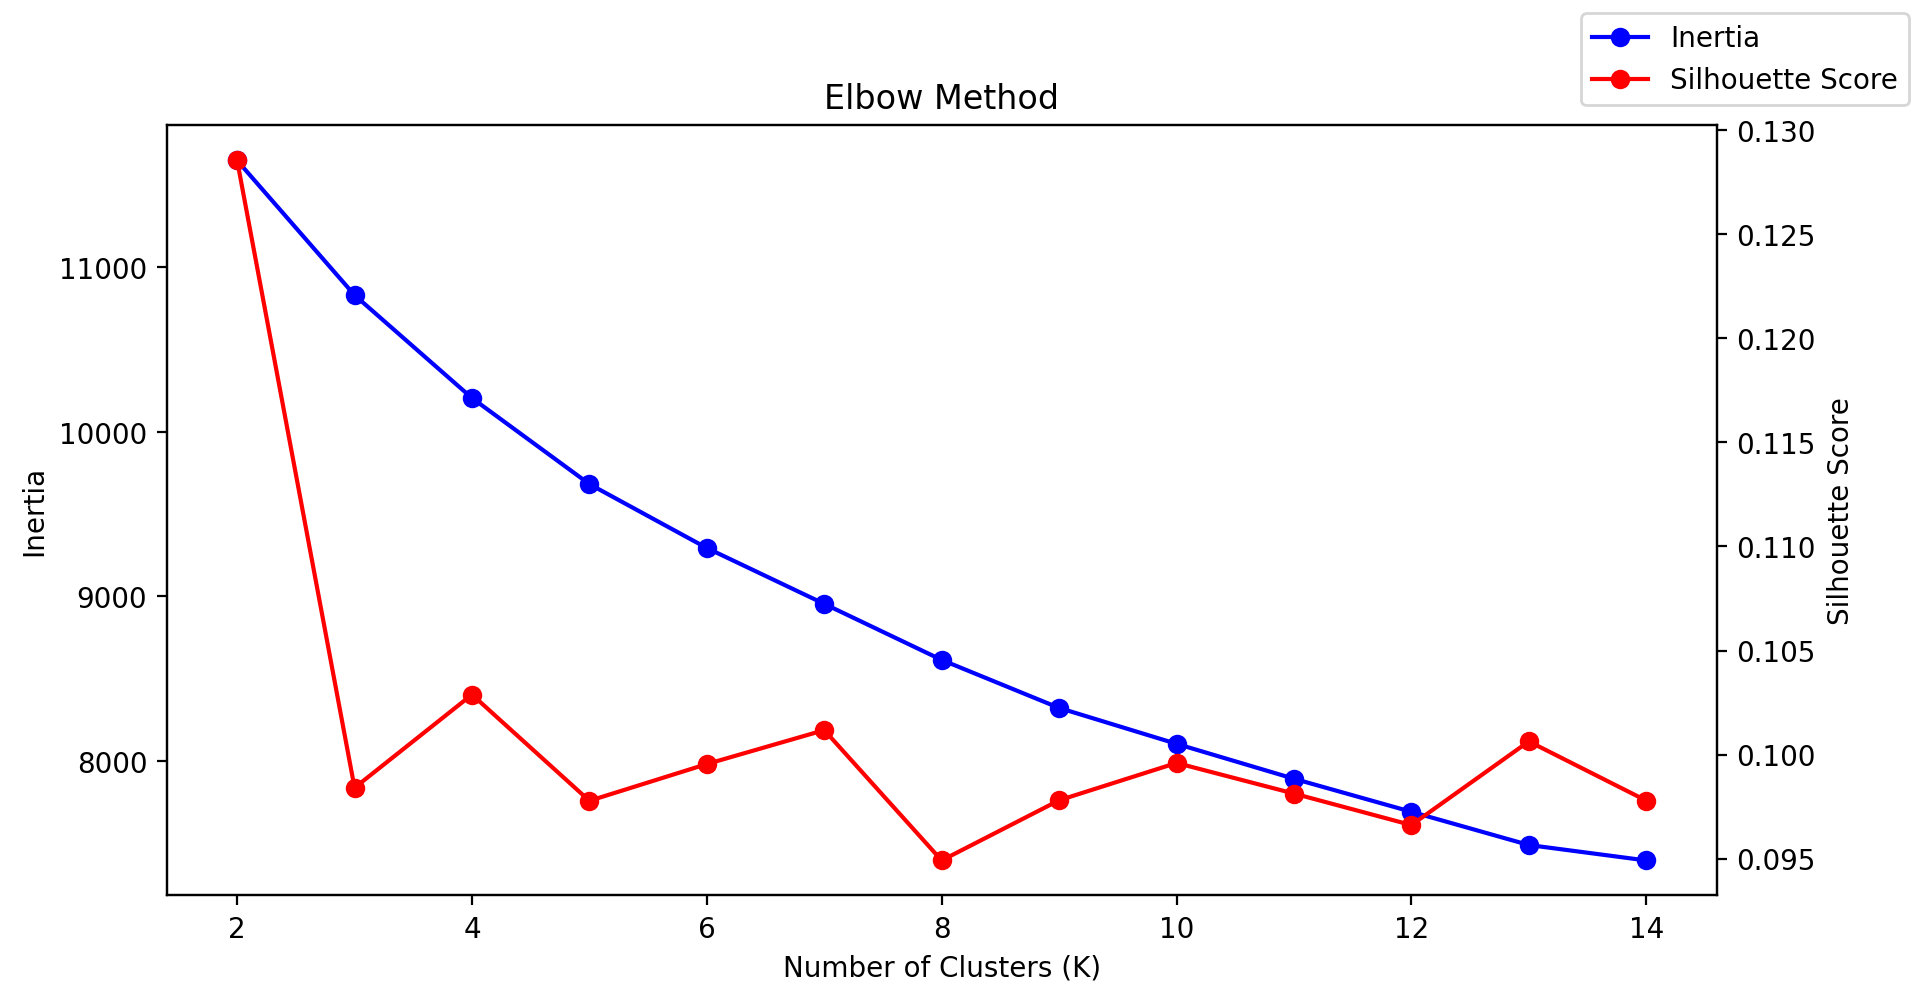

In [ ]:
# 하이퍼파라미터 튜닝 :  Elbow Point(급격한 감소가 멈추는 지점)와 Silhouette Score가 높은 K를 선택
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(K_range, inertias, 'bo-', label="Inertia")
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouettes, 'ro-', label="Silhouette Score")
ax2.set_ylabel("Silhouette Score")

fig.legend()
plt.show()

k = 7로 결정

In [ ]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_customer['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_summary = df_customer.groupby('cluster').mean()
display(cluster_summary)

,total_sales,avg_discount,avg_shipping_cost,total_profit,total_qty,order_count,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class,order_region_Central Asia,order_region_North Asia,order_region_Oceania,order_region_Southeast Asia
cluster,,,,,,,,,,,,,,,,,
0,6573.213740,0.179416,30.128827,512.682987,85.862595,10.106870,0.361114,0.285490,0.353396,0.145860,0.049421,0.158994,0.645725,4.198473,3.580153,7.030534,7.916031
1,2317.136364,0.168331,23.391282,200.389859,37.386364,5.295455,0.128581,0.661176,0.210244,0.139473,0.040490,0.162260,0.657778,1.761364,1.784091,2.681818,3.784091
2,3277.850340,0.156980,32.455008,332.191003,36.897959,5.551020,0.662976,0.177940,0.159084,0.110760,0.020381,0.100585,0.768275,1.768707,1.829932,3.374150,3.068027
3,7960.877863,0.092813,48.376310,1414.940819,70.847328,8.442748,0.389173,0.224205,0.386622,0.150651,0.031890,0.220014,0.597445,3.740458,6.000000,5.839695,2.984733
4,2973.653061,0.144591,32.926949,273.253834,40.000000,5.632653,0.391879,0.299610,0.308511,0.106789,0.027730,0.535892,0.329589,2.051020,2.285714,3.551020,3.051020
5,3714.333333,0.151650,43.175456,453.867925,42.416667,5.854167,0.275513,0.288613,0.435874,0.119753,0.369416,0.104206,0.406626,1.812500,2.187500,4.687500,2.687500
6,3440.581699,0.150909,38.225297,447.388296,39.392157,5.699346,0.165822,0.159448,0.674729,0.201454,0.020292,0.164426,0.613829,1.993464,2.143791,3.241830,3.196078


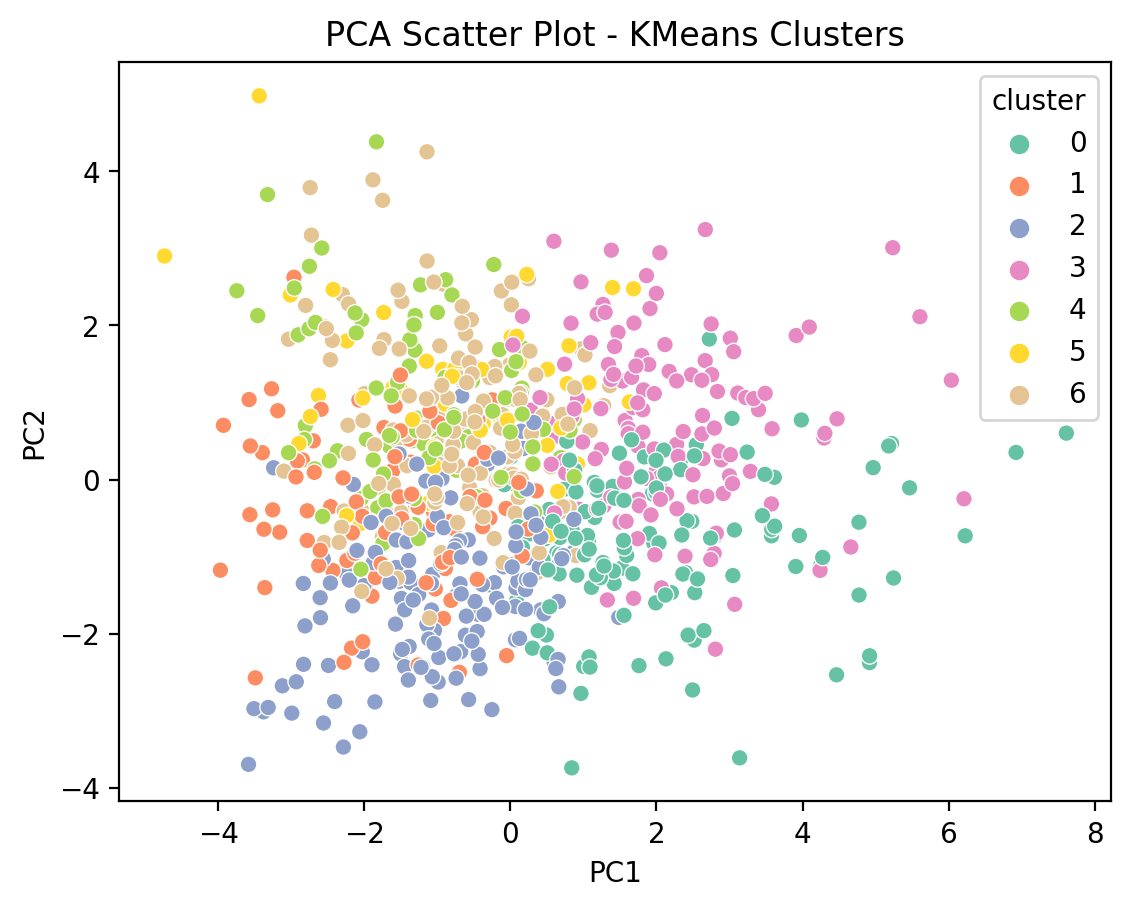

In [ ]:
# PCA를 활용한 군집 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot1['cluster'] = df_customer['cluster']

sns.scatterplot(data=df_plot1, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("PCA Scatter Plot - KMeans Clusters")
plt.show()

### K-means 결과

K = 7로 군집화 하였지만, 어떤것이 기준인지 명확하게 알아내기 어려웠음. 이를 해결하기 위해 RandomForest로 피쳐 중요도 산출

# 해석

## RandomForest

타겟 변수(y) = 클러스터 번호(cluster)

입력 변수(X) = order_region, total_sales, avg_discount, total_qty 등 군집화에 사용된 모든 피처

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 클러스터별 피처 중요도 저장용 딕셔너리
cluster_feature_importance = {}

sorted_clusters = sorted(df_customer['cluster'].unique())


 Processing Cluster 0...


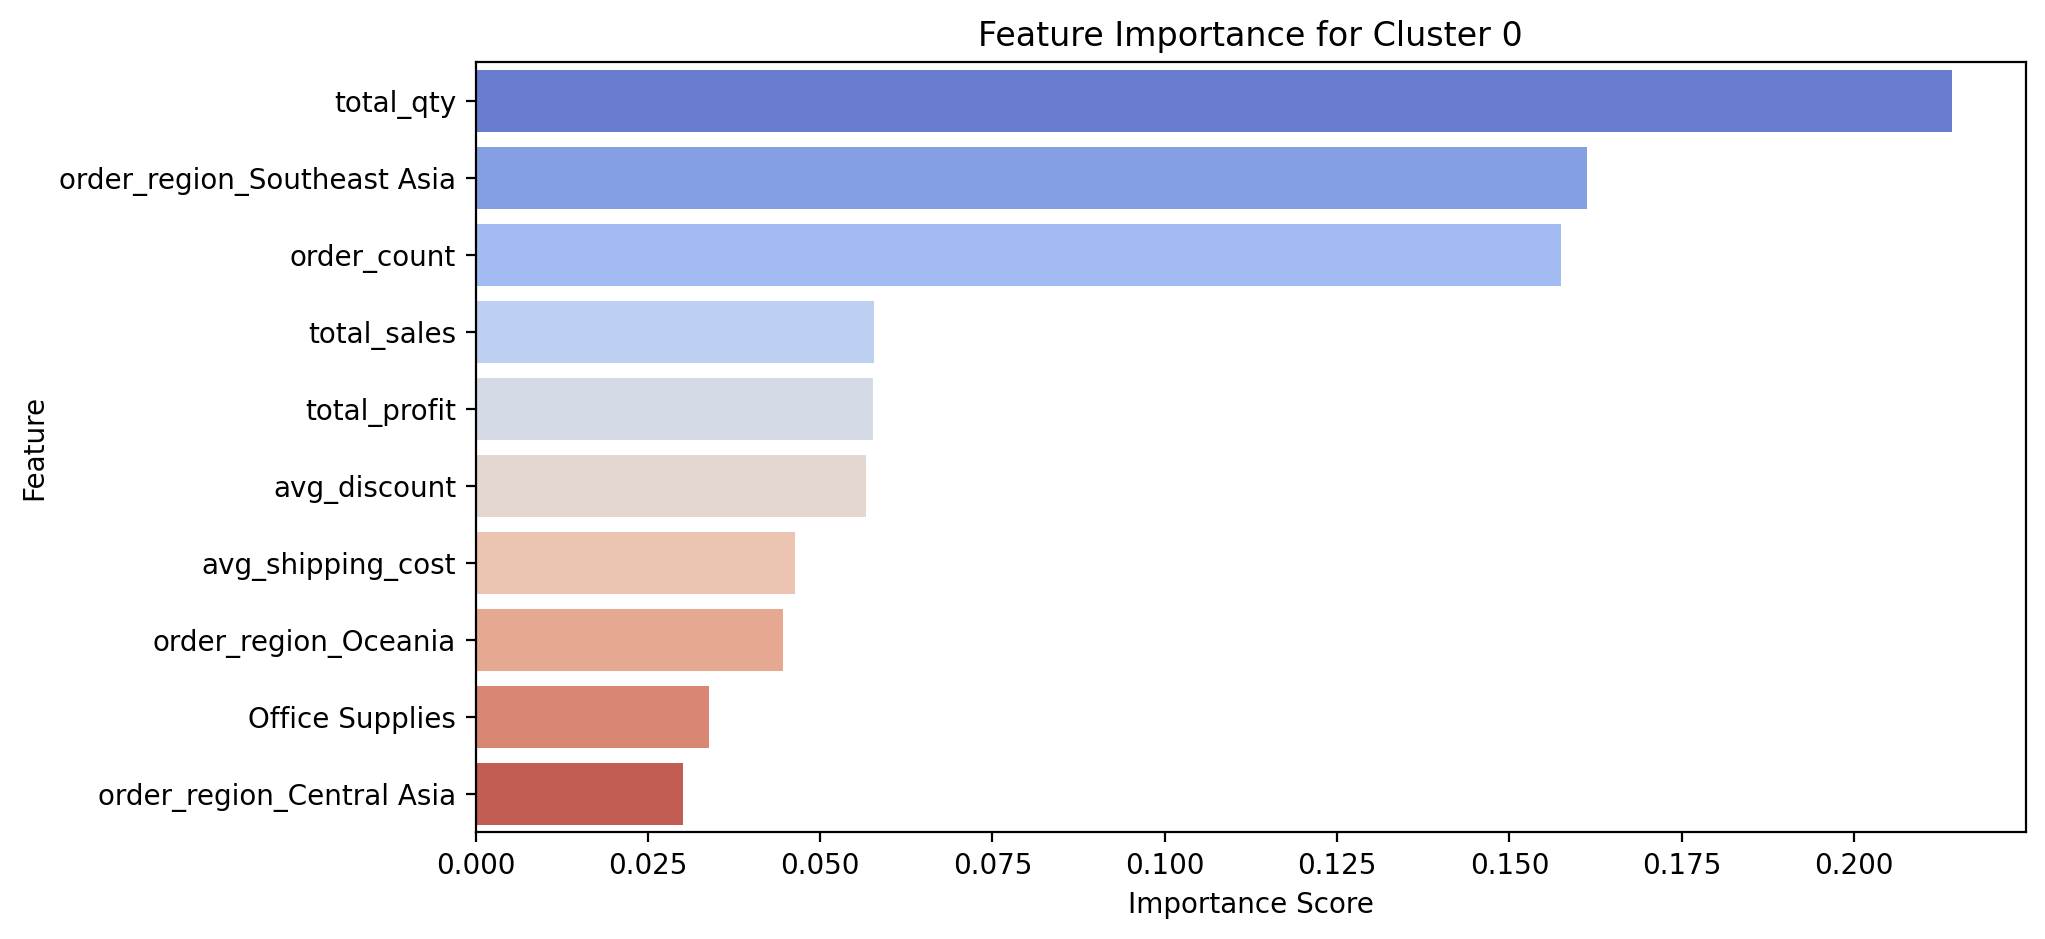


 Processing Cluster 1...


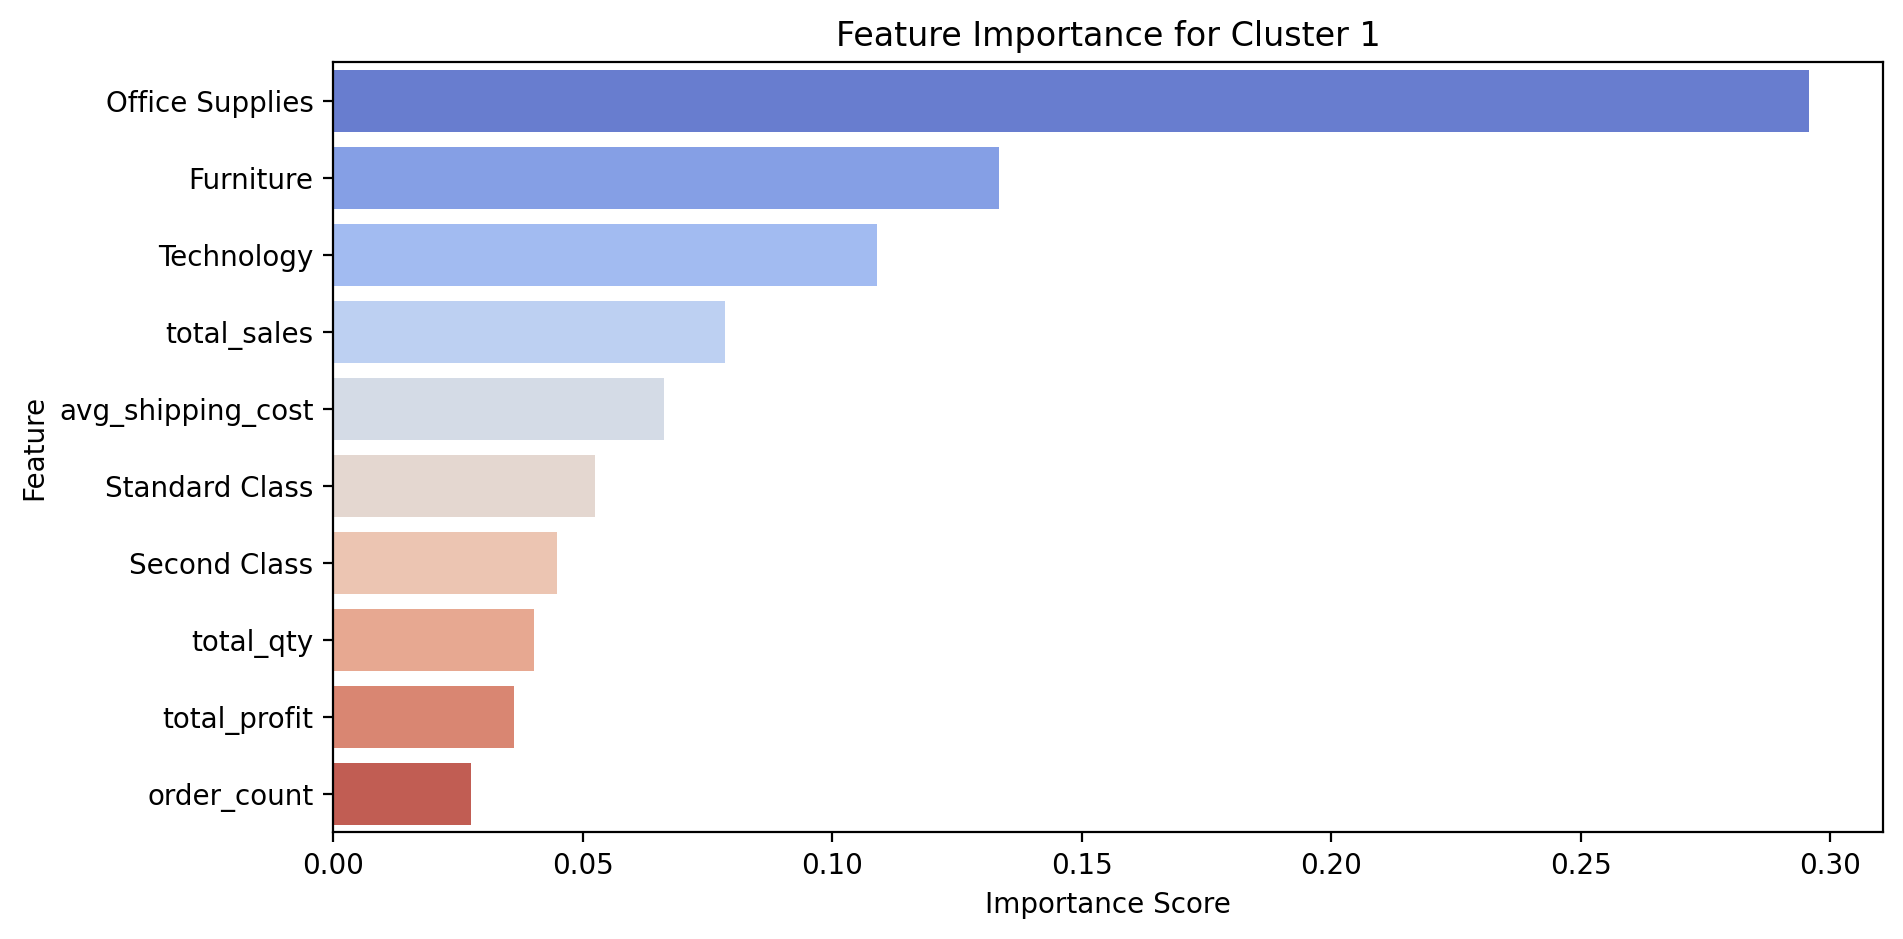


 Processing Cluster 2...


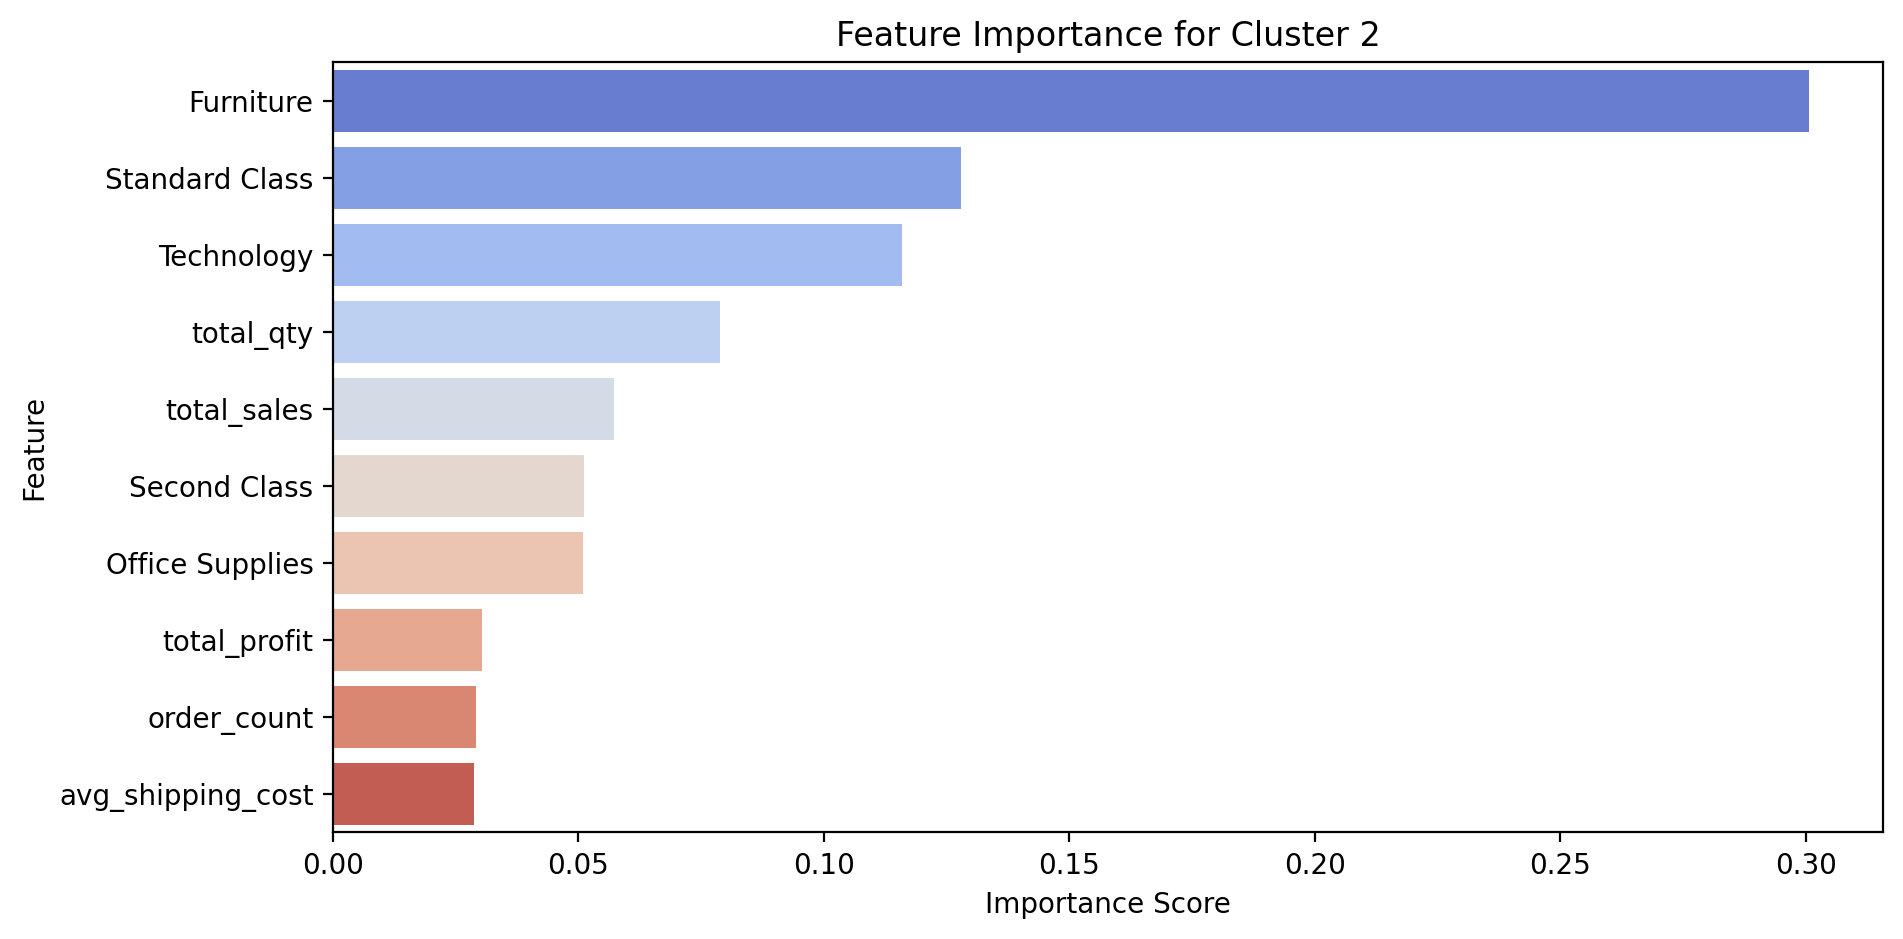


 Processing Cluster 3...


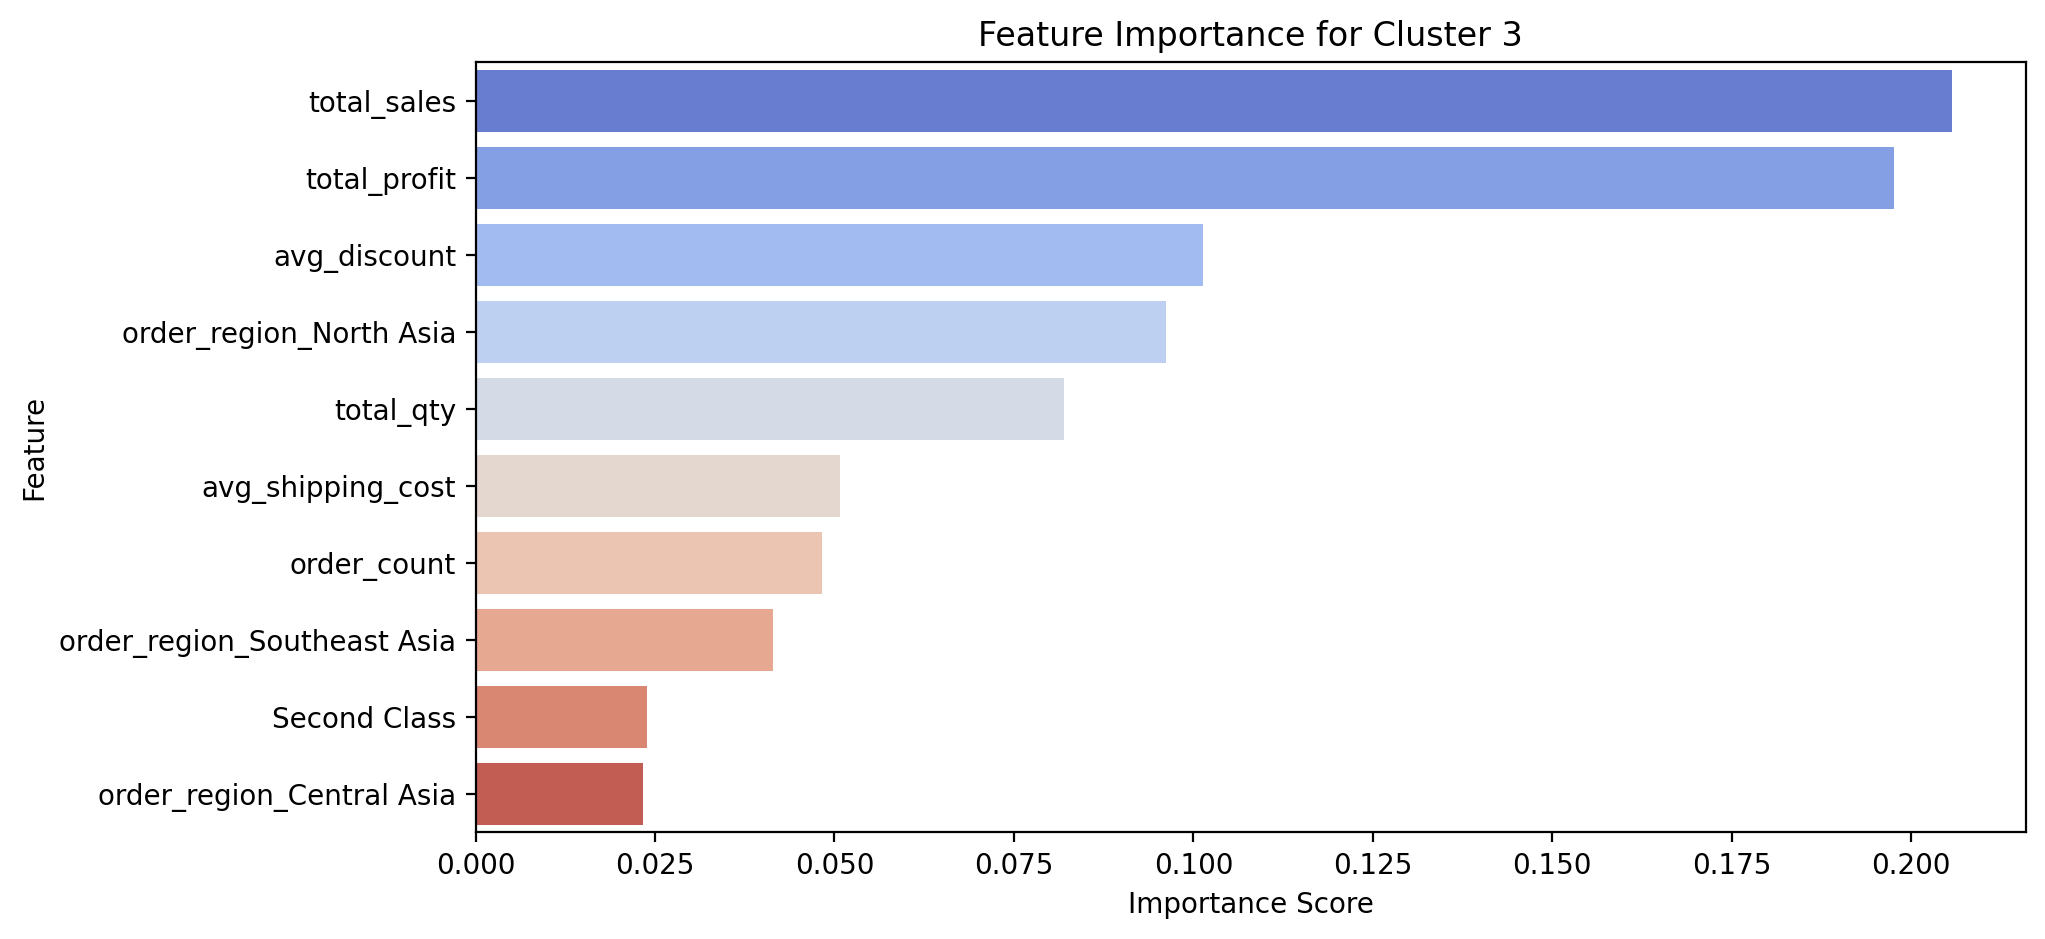


 Processing Cluster 4...


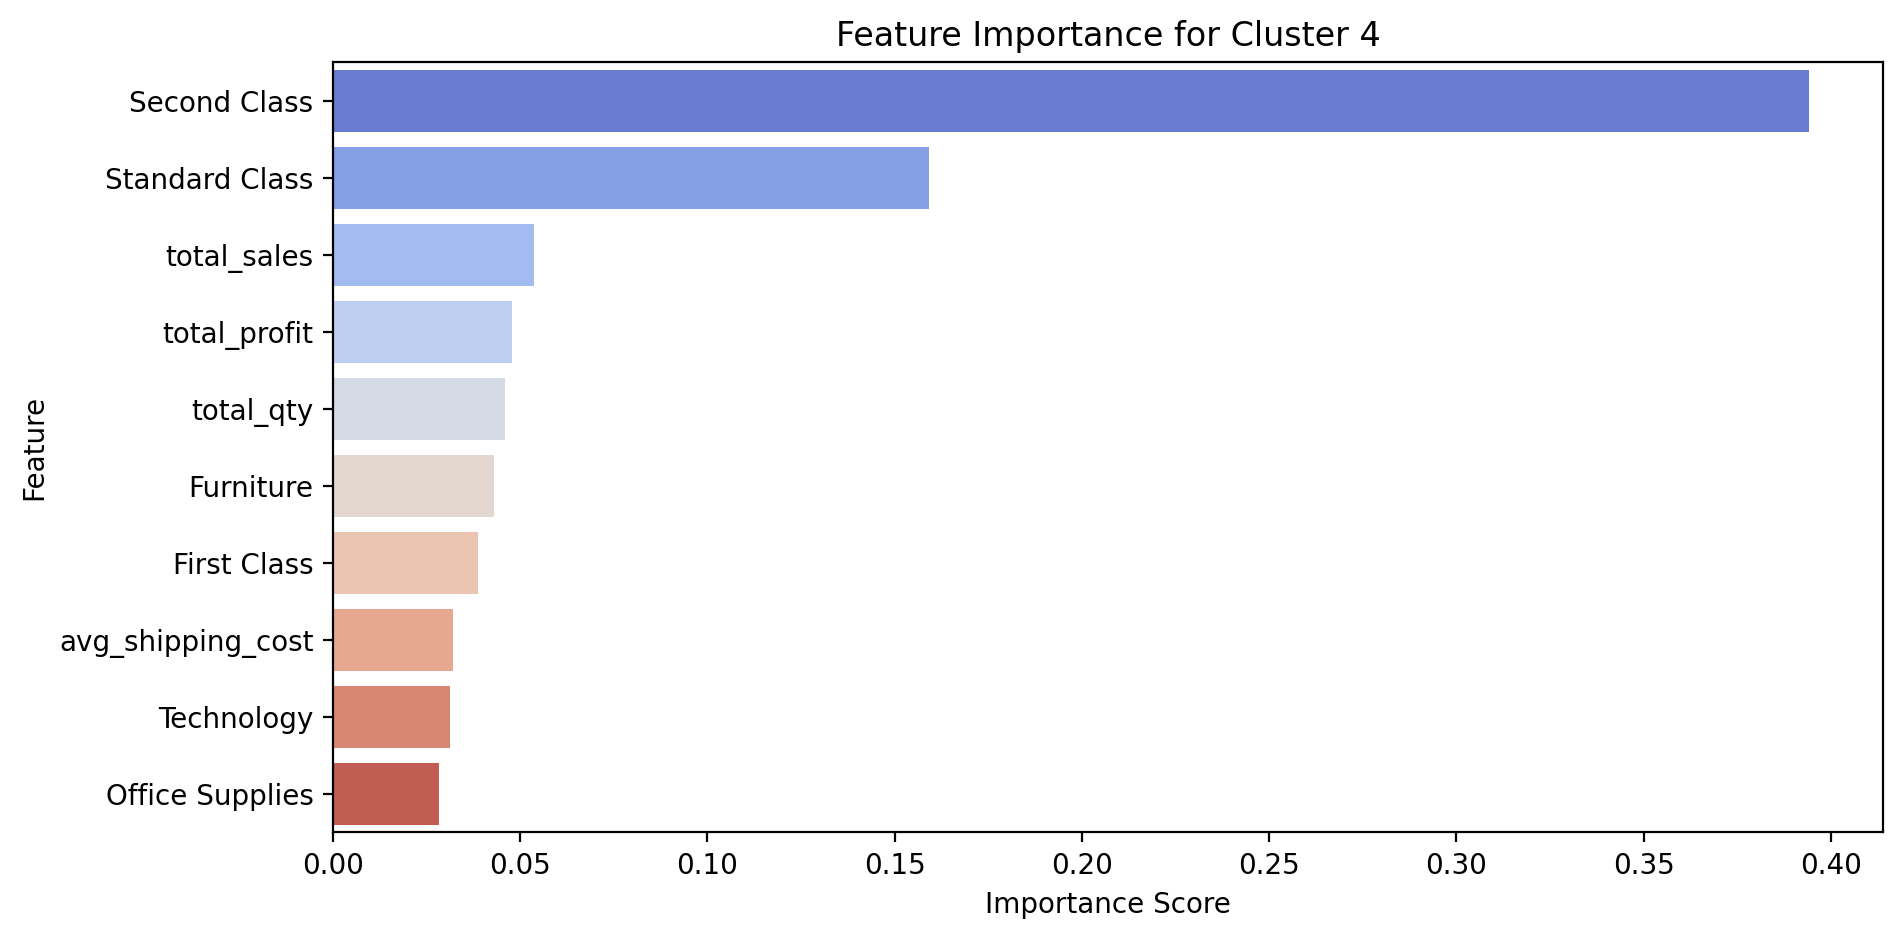


 Processing Cluster 5...


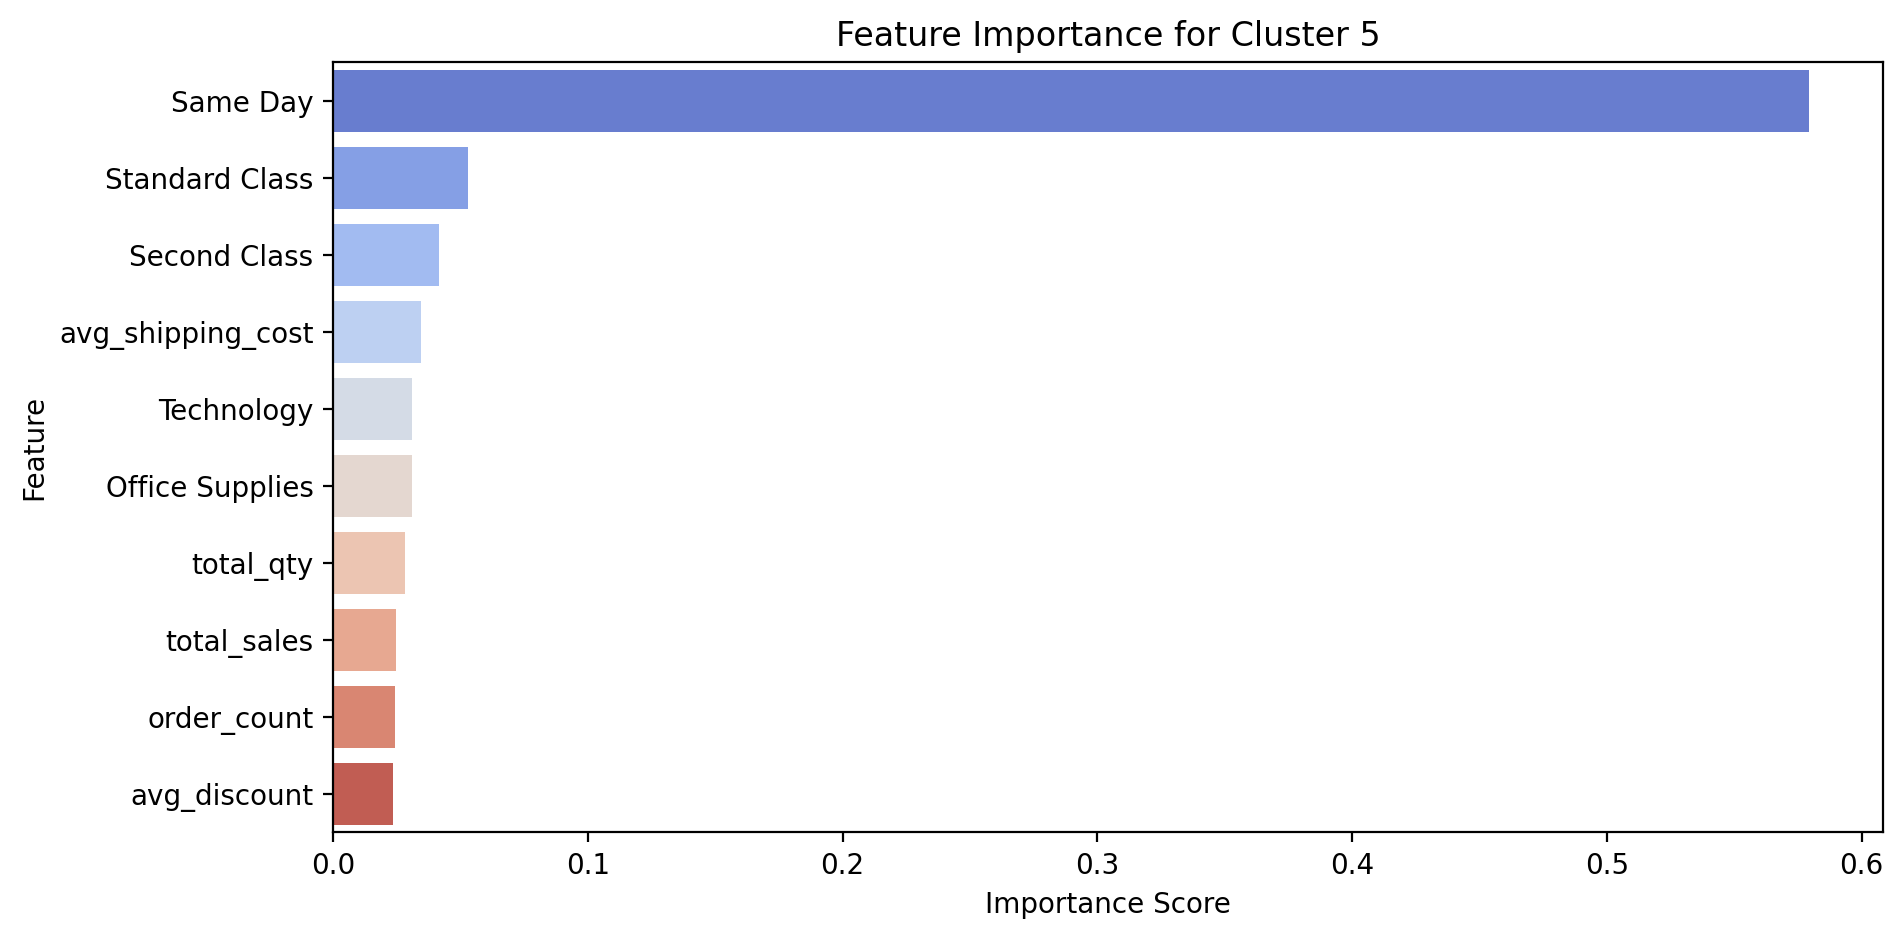


 Processing Cluster 6...


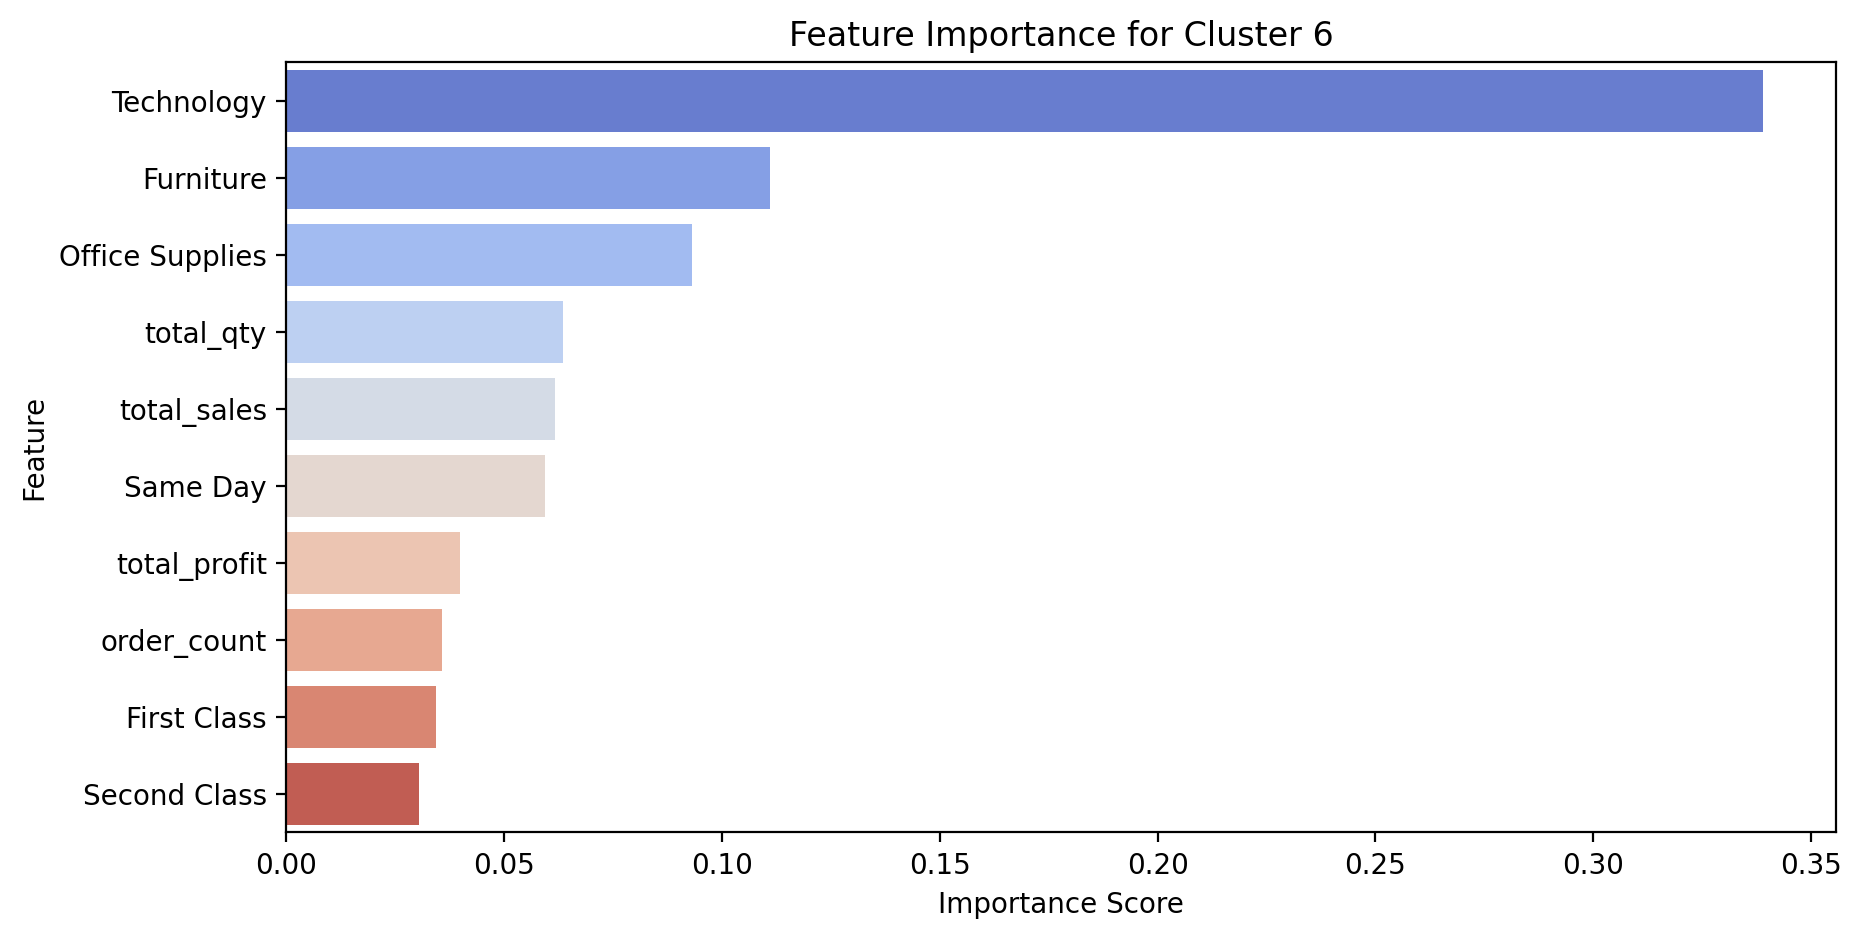

In [ ]:
# 클러스터별 랜덤 포레스트 학습 (해당 클래스 = 1, 나머지 =0)
for cluster_id in sorted_clusters:
    print(f"\n Processing Cluster {cluster_id}...")

    # 클러스터별 타겟 설정
    y = (df_customer['cluster'] == cluster_id).astype(int)  # 현재 클러스터는 1, 나머지는 0
    x = df_customer.drop(columns=['cluster'])  # 클러스터 컬럼 제외

    # 데이터 스케일링
    x_scaled = scaler.fit_transform(x)

    # TRAIN - TEST SPLIT
    x_train, x_test, y_train, y_test = train_test_split(
        x_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # 랜덤 포레스트 모델 학습
    rf_model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
    rf_model.fit(x_train, y_train)

    # 피처 중요도 추출
    feature_importance = pd.DataFrame({
        'Feature': x.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # 결과 저장
    cluster_feature_importance[cluster_id] = feature_importance

    # 시각화 (각 클러스터별 개별 바 플롯)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=feature_importance.head(10),  # 상위 10개 변수만 표시
        x='Importance',
        y='Feature',
        palette='coolwarm'
    )
    plt.title(f"Feature Importance for Cluster {cluster_id}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()


물건 카테고리가 클러스터를 나누는데 중요하다는 결과가 나옴. 그렇기에 물품 별 특성 파악이 중요하고 이를 반영하여 해석해야함.

## 물건 카테고리 별 특징 파악

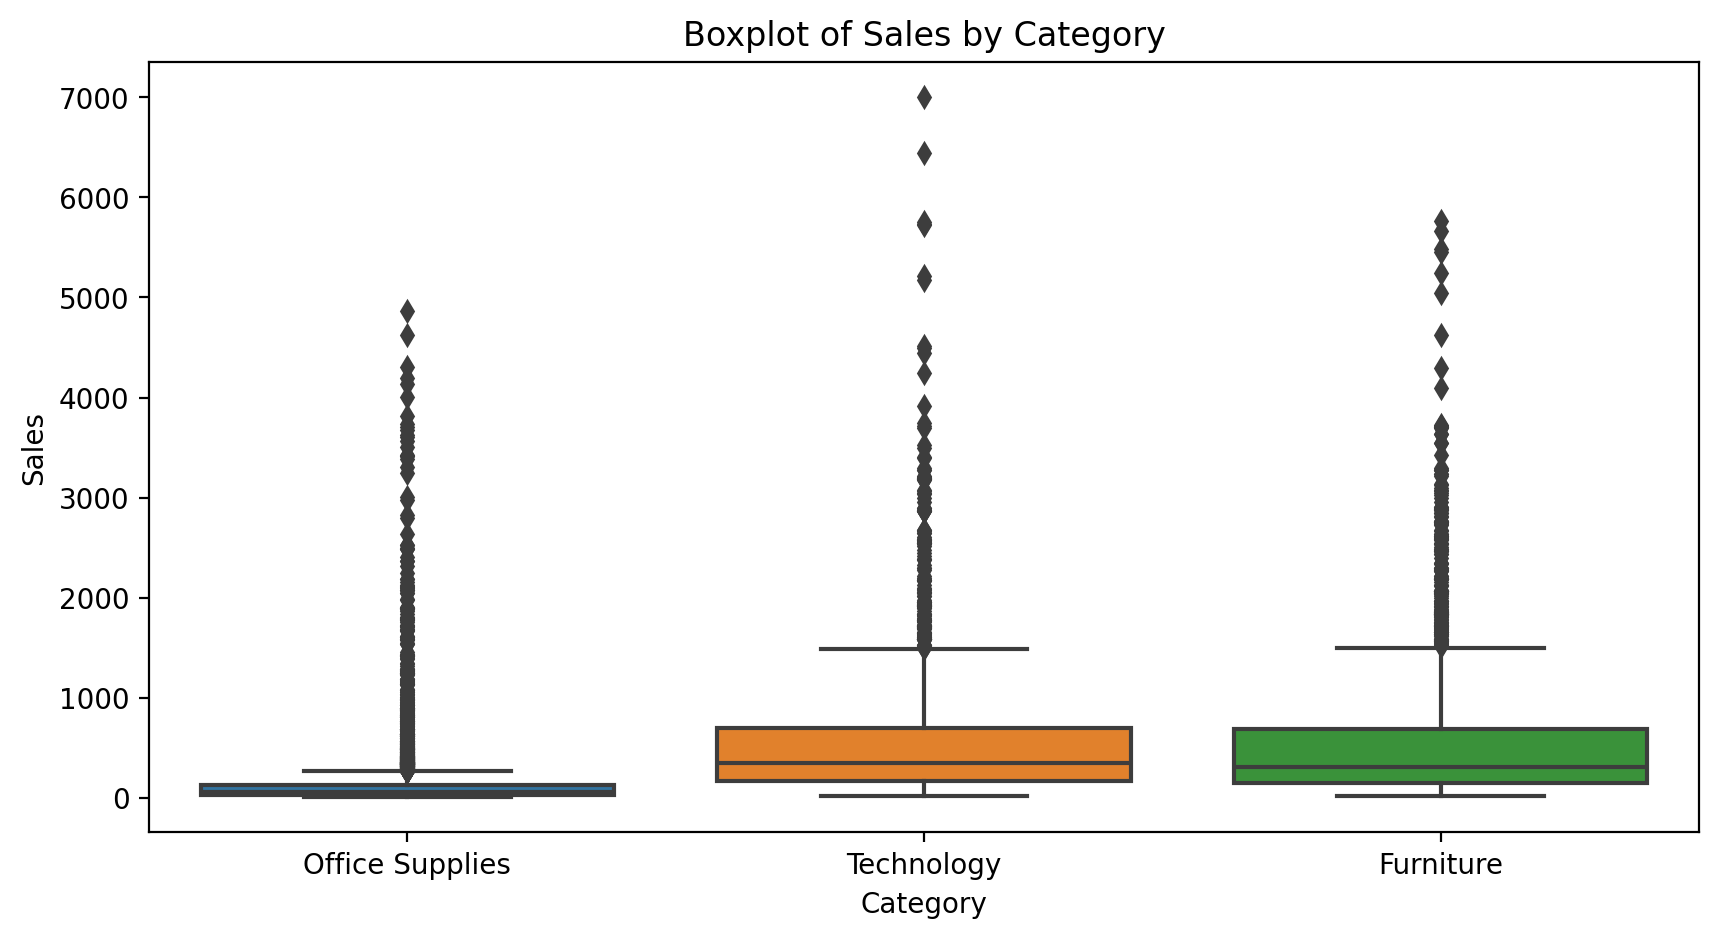

In [ ]:
# EDA
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df1,
    x='category',
    y='sales'
)
plt.title("Boxplot of Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [ ]:
# 카테고리 별 매출 관련 수치 비교 -> outlier가 너무 많아서 중위값으로 대채
print(df1.groupby('category')[target_vars].median())

                 sales  discount  shipping_cost  profit  quantity
category                                                         
Furniture        312.0       0.1          28.06   27.60       3.0
Office Supplies   58.0       0.1           5.38    5.58       3.0
Technology       347.0       0.1          30.98   36.36       3.0


In [ ]:
print(df1.groupby('category')[target_vars].mean()) # discount차이 보기 위해

                      sales  discount  shipping_cost     profit  quantity
category                                                                 
Furniture        553.296830  0.138201      59.981247  51.830445  3.745986
Office Supplies  143.172576  0.157793      15.148515  17.081114  3.745184
Technology       566.568447  0.136540      61.727164  85.389756  3.753339


In [ ]:
# ANOVA 수행(alpha = 0.05)

for var in target_vars:
    print(f"=== ANOVA for {var} by Category ===")
    # (1) OLS 모델 적합
    model = ols(f'{var} ~ C(category)', data=df1).fit()

    # (2) ANOVA 테이블
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    print('\n')

=== ANOVA for sales by Category ===
                   sum_sq       df          F  PR(>F)
C(category)  4.706271e+08      2.0  899.62771     0.0
Residual     2.876983e+09  10999.0        NaN     NaN


=== ANOVA for discount by Category ===
                 sum_sq       df          F        PR(>F)
C(category)    1.132598      2.0  18.264733  1.204676e-08
Residual     341.024680  10999.0        NaN           NaN


=== ANOVA for shipping_cost by Category ===
                   sum_sq       df           F         PR(>F)
C(category)  5.661252e+06      2.0  639.980261  1.195910e-263
Residual     4.864846e+07  10999.0         NaN            NaN


=== ANOVA for profit by Category ===
                   sum_sq       df           F        PR(>F)
C(category)  8.519385e+06      2.0  150.478479  3.358400e-65
Residual     3.113559e+08  10999.0         NaN           NaN


=== ANOVA for quantity by Category ===
                   sum_sq       df         F    PR(>F)
C(category)      0.118943      2.0  0

In [ ]:
for var in target_vars:
    if var != 'quantity':  # ANOVA에서 차이가 없었던 변수 제외
        print(f"\n=== Post-hoc test (Tukey's HSD) for {var} by category ===")
        tukey_result = pairwise_tukeyhsd(df1[var], df1['category'])
        print(tukey_result)
        print('\n')


=== Post-hoc test (Tukey's HSD) for sales by category ===
            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------
      Furniture Office Supplies -410.1243    0.0 -438.8354 -381.4131   True
      Furniture      Technology   13.2716 0.6395  -21.2463   47.7895  False
Office Supplies      Technology  423.3959    0.0  394.5431  452.2486   True
---------------------------------------------------------------------------



=== Post-hoc test (Tukey's HSD) for discount by category ===
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
      Furniture Office Supplies   0.0196    0.0  0.0097  0.0295   True
      Furniture      Technology  -0.0017 0.9426 -0.0135  0.01

### 물건 카테고리 결론

가구와 전자제품은 차이가 없음. 다만 전자제품의 이익률이 가장 높은 고부가제품임.

사무 용품의 경우 가장 낮은 매출, 운송비, 이익을 기록하며 이에 따라 할인률이 가장 높음.

1️⃣ Furniture

✔ 높은 매출 & 높은 운송비

✔ 운송비 부담이 커서 Standard Class를 선호할 가능성

2️⃣ Office Supplies

✔ 가장 낮은 매출, 이익, 운송비 등 모든 수치에서 가장 낮음

✔ 할인율이 가장 높고 이에 따라 이익률이 낮음

✔ 소량 주문 가능성이 높으며, Standard Class를 선호하는 경향

3️⃣ Technology

✔ 가장 높은 매출, 이익 & 높은 운송비

✔ 할인율은 Furniture와 유사하나 이익률이 가장 높음 -> 고부가가치 상품

✔ 고객들이 빠른 배송(Same Day, First Class)을 선호할 가능성 큼

## 고객 세그먼트 총 해석

Cluster 0 : 대량 구매를 자주 하는 동남아시아 중심 고객

✔ 총 주문량(Total Quantity)와 주문 빈도(Order Count) 중심

✔ 동남아시아(Southeast Asia) 고객 비율 높음

✔ Standard Class(저렴한 배송) 선호 경향

✔ 주로 Office Supplies(사무용품) 구매

✔ 낮은 단가의 상품을 대량 구매하는 기업 고객(B2B) 가능성


Cluster 1 : 사무용품 중심 & 가격 민감형 고객군

✔ Office Supplies(사무용품) 구매율이 가장 높음

✔ Furniture & Technology 구매도 일부 존재

✔ Standard Class(저렴한 배송) 중심, 할인에 민감한 고객군

✔ 총 매출이 낮고, 이익률이 가장 낮은 그룹

✔ 중앙아시아(Central Asia) 고객 포함 가능성 높음

Cluster 2 : 프리미엄 가구 중심 고객군


✔ Furniture(가구) 구매 비율이 가장 높음

✔ Technology(전자제품)와 함께 구매하는 경향

✔ Standard Class 배송 선호 → 높은 운송비 부담을 최소화하려는 특성


Cluster 3 : 할인 프로모션 반응형 고객군

✔ 높은 매출(Total Sales)과 높은 이익(Total Profit)

✔ 할인율(Avg Discount) 영향이 큼 → 프로모션에 민감한 고객

✔ 동북아시아(North Asia) 고객 다수 포함 → First Class(고급 배송) 선호 경향

✔ Furniture, Technology 구매 비중 높음


Cluster 4 : 비용 절감형 고객군

✔ Second Class 및 Standard Class 배송 선호

✔ Furniture(가구) 중심 소비, 일부 Office Supplies 포함

✔ 비싼 배송을 피하려는 성향 강함

✔ 중앙아시아(Central Asia) 고객 포함 가능성 높음

Cluster 5 : 긴급 배송 선호 고객군


✔ Same Day 배송(가장 비싼 옵션) 선호도가 절대적

✔ 평균 배송비(Avg Shipping Cost)와 연관성이 높음

✔ Technology & Office Supplies 구매 비율 높음

✔ 기업 고객(B2B) 비율이 높을 가능성 큼


Cluster 6 : 테크 중심 & 고부가가치 고객군

✔ Technology(전자제품) 중심 소비 → 가장 높은 이익률을 기록하는 고객군

✔ Furniture, Office Supplies도 일정 비율 포함

✔ Same Day, First Class 배송 사용 가능성 큼

✔ 고급 제품을 선호하며 빠른 배송 옵션을 원함


클러스터 별 최적의 할인율 계산 by xgboost

# Modeling 2 | 최적의 할인율 도출

클러스터별 평균 할인율 계산.

클러스터별 최적의 할인율 예측.

현재 클러스터별 고객 특성이 다르며, 일괄적인 할인율 적용은 가설 B에 의해 수익성을 저하시킬 위험이 있음.

따라서 각 클러스터별 최적 할인율을 머신러닝(XGBoost) 모델을 활용하여 예측하고, 이를 기반으로 차등 할인 전략을 도입해야 함.

- 기존 문제점

    무분별한 할인 적용으로 이익률 감소

    동남아 시장(Cluster 0)은 높은 할인율로 인해 이익률이 낮음

    반면, 프리미엄 고객(Cluster 5, 6)은 할인보다 빠른 배송을 더 선호

- 할인율과 이익률의 반비례 관계

    이익률에 영향을 끼치는 변수는 할인율이 유일함.

    할인율이 높아지면 절대적으로 이익률이 낮아짐.    

- 고객 특성에 맞춘 할인 정책 필요

    모든 고객에게 동일한 할인율을 제공하는 것은 효율적이지 않음

    그러므로 클러스터 별 이익률을 최대화 하는 할인율을 도출한 뒤, 이를 토대로 비즈니스 플랜 수립.

## XGB

### 클러스터별 평균 할인율 계산(이후 최적의 할인율과 비교 대상)

In [ ]:
# 클러스터별 평균 할인율
avg_dc = df_customer.groupby('cluster')['avg_discount'].mean()
avg_dc

cluster
0    0.179416
1    0.168331
2    0.156980
3    0.092813
4    0.144591
5    0.151650
6    0.150909
Name: avg_discount, dtype: float64

### 최적의 할인율 예측

우리는 최적의 할인율을 이익률이 가장 높은 할인율로 정의할 수 있음.

In [ ]:
# 라이브러리 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [ ]:
# 이익률(Profit Margin) 계산
df_customer['profit_margin'] = df_customer['total_profit'] / df_customer['total_sales']

#  Feature Selection (이익률을 예측하는 회귀 모델 생성)
features = ['total_sales', 'avg_shipping_cost', 'total_profit', 'total_qty',
            'order_count', 'Furniture', 'Office Supplies', 'Technology',
            'First Class', 'Same Day', 'Second Class', 'Standard Class',
            'order_region_Central Asia', 'order_region_North Asia',
            'order_region_Oceania', 'order_region_Southeast Asia', 'avg_discount']

X = df_customer[features]  # 입력 변수 (할인율 포함)
y = df_customer['profit_margin']  # 타겟 변수

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

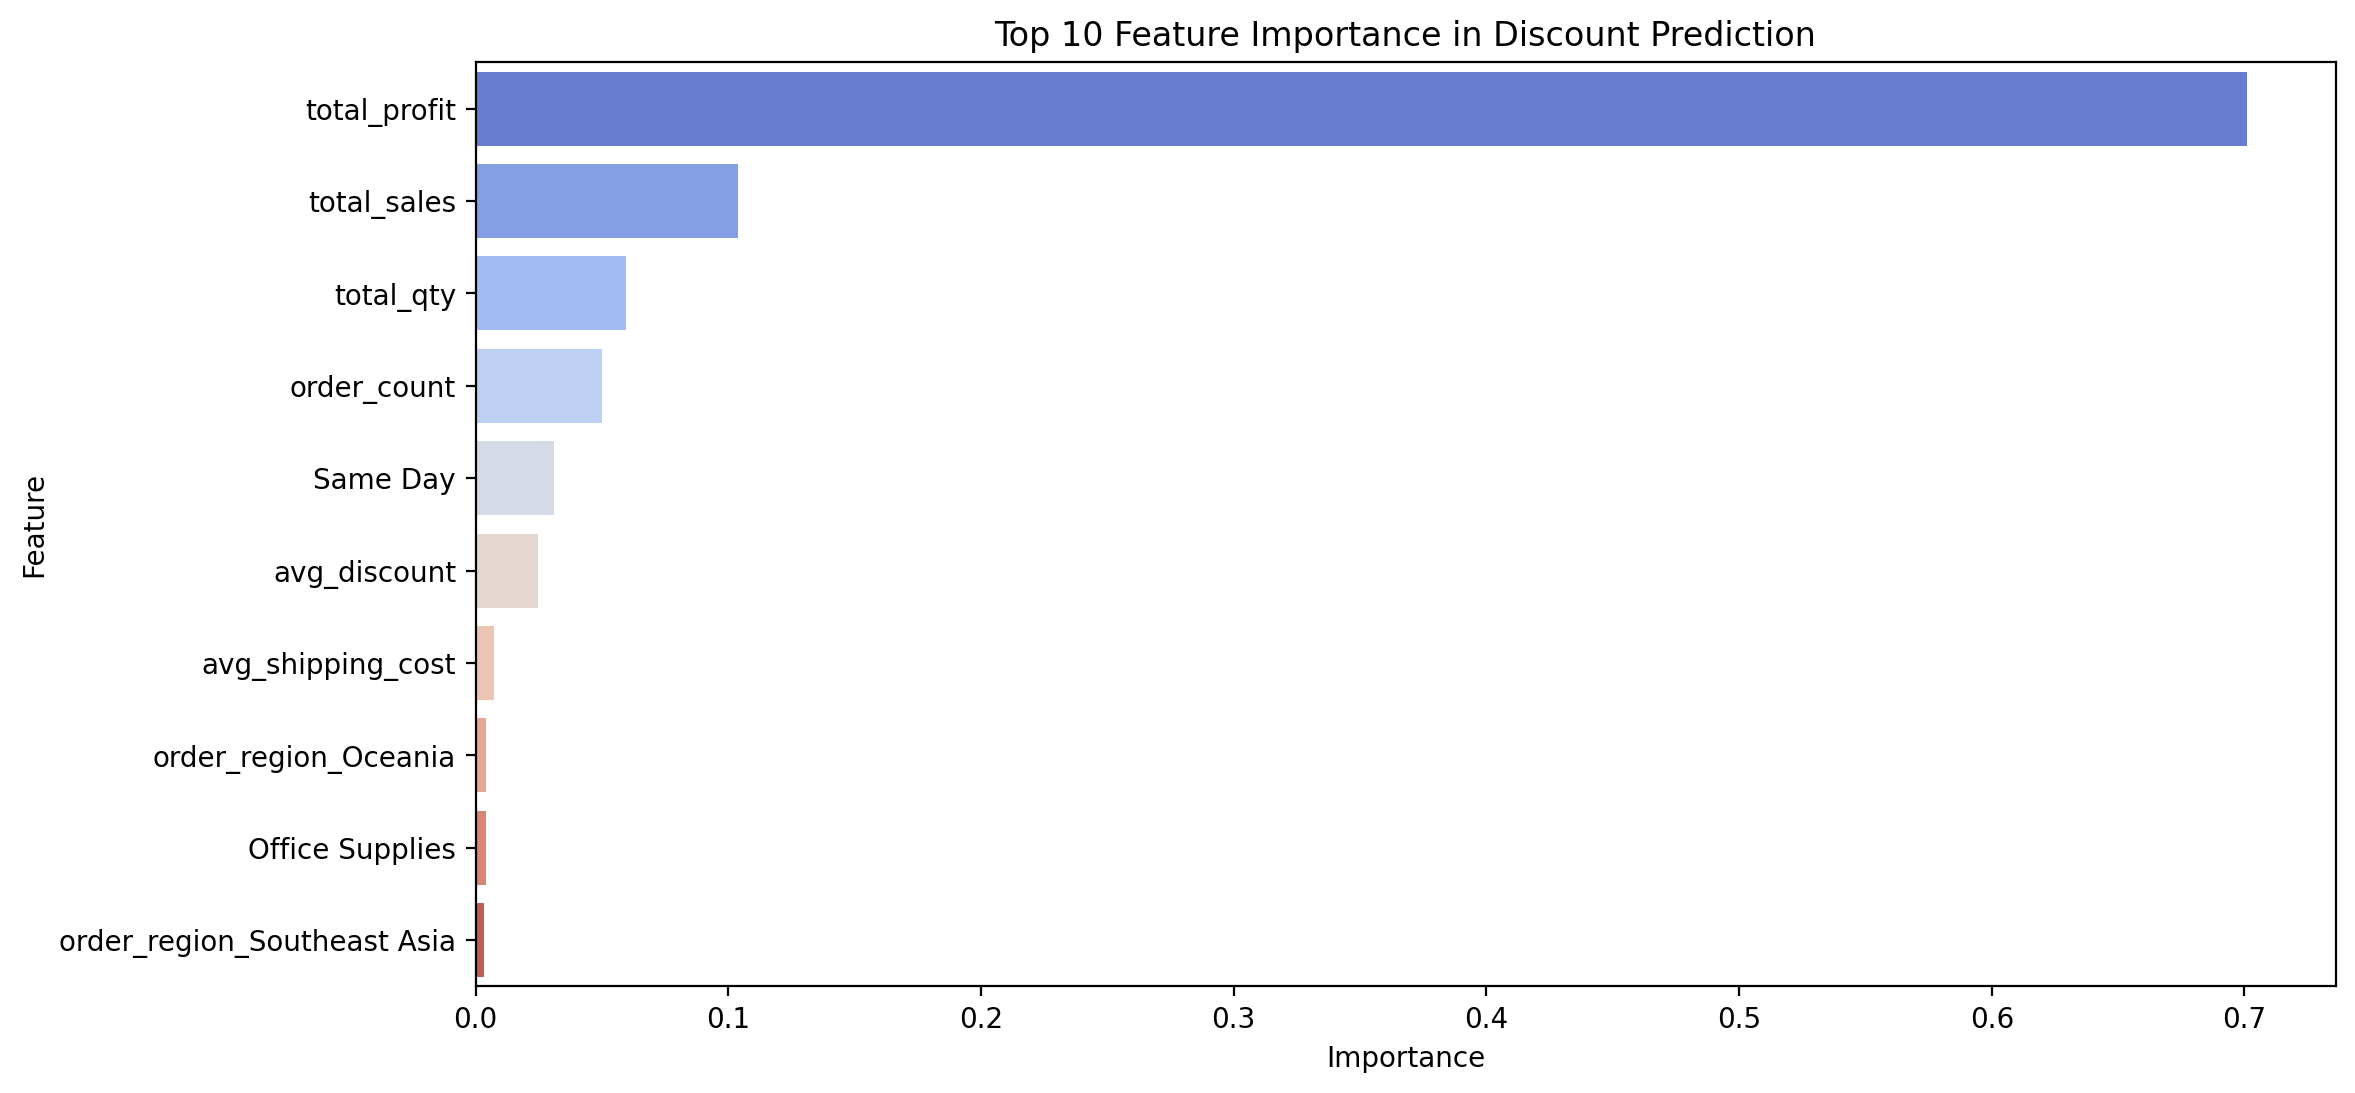

                        Feature  Importance
2                  total_profit    0.700998
0                   total_sales    0.103956
3                     total_qty    0.059482
4                   order_count    0.050030
9                      Same Day    0.031110
16                 avg_discount    0.024555
1             avg_shipping_cost    0.007210
14         order_region_Oceania    0.004034
6               Office Supplies    0.003939
15  order_region_Southeast Asia    0.003366
5                     Furniture    0.002306
10                 Second Class    0.002048
8                   First Class    0.001799
13      order_region_North Asia    0.001661
12    order_region_Central Asia    0.001295
11               Standard Class    0.001227
7                    Technology    0.000983


In [ ]:
# 할인율에 영향을 끼치는 Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='coolwarm')
plt.title("Top 10 Feature Importance in Discount Prediction")
plt.show()

print(feature_importance)


In [ ]:
# XGBoost 모델 학습 (Grid Search 적용)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   # 학습률 조정
    'max_depth': [3, 5, 7,9,11],         # 트리 깊이 조정
    'n_estimators': [100, 200, 300]      # 트리 개수 조정
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# 최적 모델 선택
best_xgb = grid_search.best_estimator_

In [ ]:
# 최적 할인율 찾기 (argmax 적용)
def find_optimal_discount(xgb_model, X_row):
    """
    XGBoost 모델을 활용하여 최적 할인율(이익률이 최대가 되는 할인율)을 찾음
    """
    best_discount = 0
    max_profit_margin = -np.inf  # 초기값

    for discount in np.linspace(0, 0.5, 50):  # 0% ~ 50% 할인율 탐색
        X_row['avg_discount'] = discount  # 할인율을 조정하여 테스트
        predicted_profit_margin = xgb_model.predict(X_row.values.reshape(1, -1))

        if predicted_profit_margin > max_profit_margin:
            max_profit_margin = predicted_profit_margin
            best_discount = discount

    return best_discount

In [ ]:
# 클러스터별 최적 할인율 적용
df_customer['optimal_discount'] = df_customer.apply(lambda row: find_optimal_discount(best_xgb, row[features]), axis=1)

# 클러스터별 평균 최적 할인율 계산
optimal_discounts = df_customer.groupby('cluster')['optimal_discount'].mean()
print("\n📌 클러스터별 최적 할인율")
print(optimal_discounts)


📌 클러스터별 최적 할인율
cluster
0    0.054370
1    0.028989
2    0.041858
3    0.053747
4    0.077364
5    0.122662
6    0.044351
Name: optimal_discount, dtype: float64


In [ ]:
# 평균 할인율과 최적 할인율 차이
dif = pd.DataFrame(100*(avg_dc-optimal_discounts),columns=['difference'])
dif

,difference
cluster,
0,12.504653
1,13.934257
2,11.512222
3,3.906646
4,6.722705
5,2.898862
6,10.655810
